# Importing Libraries

In [3]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Data Understanding and Preparation

## Reading Data

In [4]:
artists_path = 'data\\artists.csv'
tracks_path = 'data\\tracks.csv'

This code automatically detects the correct separator for two dataset files (tracks and artists) by checking which character — comma, semicolon, or tab — appears most in the first line. It then loads each file into a pandas DataFrame using the detected separator, prints their shapes, and displays the first few rows.

 The tracks dataset has 11,166 rows and 45 columns, while the artists dataset has 104 rows and 14 columns.

In [5]:
# Funzione helper per capire il separatore corretto
def detect_separator(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        sample = f.readline()
    # Conta quanti separatori compaiono
    seps = {',': sample.count(','), ';': sample.count(';'), '\t': sample.count('\t')}
    best_sep = max(seps, key=seps.get)
    print(f"Detected separator for {filepath}: '{best_sep}'")
    return best_sep

# Rileva automaticamente il separatore
sep_tracks = detect_separator(tracks_path)
sep_artists = detect_separator(artists_path)

print('------------------------------------')

# Carica i dataset in base al separatore rilevato
tracks = pd.read_csv(tracks_path, sep=sep_tracks, encoding='utf-8', engine='python')
artists = pd.read_csv(artists_path, sep=sep_artists, encoding='utf-8', engine='python')

# Mostra alcune info per verifica
print(f"Tracks shape: {tracks.shape}")
print(f"Artists shape: {artists.shape}")
print('------------------------------------')

print('TRACKS')
display(tracks.head(3))

print('------------------------------------')
print('ARTISTS')
display(artists.head(3))


Detected separator for data\tracks.csv: ','
Detected separator for data\artists.csv: ';'
------------------------------------
Tracks shape: (11166, 45)
Artists shape: (104, 14)
------------------------------------
TRACKS


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\r\nBdope, chiama due b—\r\n\r\nMi can...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\r\n(Brr-poh)\r\n\r\nT...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\r\nYeah, yeah, yeah-yeah\r\nBdope, chiam...",False


------------------------------------
ARTISTS


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Artists Features")
print(artists.columns.tolist())

print("Tracks Features")
print(tracks.columns.tolist())


Artists Features
['id_author', 'name', 'gender', 'birth_date', 'birth_place', 'nationality', 'description', 'active_start', 'active_end', 'province', 'region', 'country', 'latitude', 'longitude']
Tracks Features
['id', 'id_artist', 'name_artist', 'full_title', 'title', 'featured_artists', 'primary_artist', 'language', 'album', 'stats_pageviews', 'swear_IT', 'swear_EN', 'swear_IT_words', 'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'lexical_density', 'avg_token_per_clause', 'bpm', 'centroid', 'rolloff', 'flux', 'rms', 'zcr', 'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name', 'album_release_date', 'album_type', 'disc_number', 'track_number', 'duration_ms', 'explicit', 'popularity', 'album_image', 'id_album', 'lyrics', 'modified_popularity']


## Duplicates

### Artists

The following code checks the artists dataset for duplicates in two ways: first, it looks for identical full rows to detect any completely repeated entries; then, it checks for duplicates specifically based on the artist ID and artist name columns.
<B> After performing both checks, it confirms that there are no duplicate artists in the dataset </B>.

In [7]:
# Check for duplicated artists rows
duplicates_artists = artists[artists.duplicated()]

print(f"Number of duplicated Artists rows: {duplicates_artists.shape[0]}")
display(duplicates_artists.head(5))

Number of duplicated Artists rows: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


In [8]:
# Check for duplicated artists based on artist id
duplicates_artists_id = artists[artists.duplicated(subset='id_author')]
print(f"Number of duplicated artist based on ID: {duplicates_artists_id.shape[0]}")
display(duplicates_artists_id.head(5))



Number of duplicated artist based on ID: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


In [9]:
# Check for duplicated artists based on artist name	
duplicates_artists_name = artists[artists.duplicated(subset='name')]
print(f"Number of duplicated artist based on Name: {duplicates_artists_name.shape[0]}")
display(duplicates_artists_name.head(5))

Number of duplicated artist based on Name: 0


,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


### Tracks
Duplicates rows check has been also performed here.
No duplicated rows were detected, indicating that all track entries are unique.

In [10]:
# Check for duplicated tracks rows
duplicates_tracks = tracks[tracks.duplicated()]

print(f"Number of duplicated rows: {duplicates_tracks.shape[0]}")
display(duplicates_tracks.head(5))

Number of duplicated rows: 0


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity


#### Duplicated Tracks based on ID

This code checks the tracks dataset for duplicates based specifically on the track ID column. It identifies all rows where the same ID appears more than once, counts them, and displays them.
 It first identifies all rows where the same ID appears more than once, counts how many duplicated tracks exist, and displays them. Then, it counts how many times each track ID occurs in the dataset. 

<B> The result shows that there are 73 duplicated rows based on track IDs. 
Precisely we have 71  distinct IDs that have duplicates. </B>

<B>one track ID is repeated four times, while the others are each repeated twice </B>

In [11]:
# Check for duplicated tracks based on track id
duplicates_tracks_id = tracks[tracks.duplicated(subset='id')]
print(f"Number of duplicated Tracks rows based on ID: {duplicates_tracks_id.shape[0]}")
display(duplicates_tracks_id)


# Count how many times each id_track appears
id_counts = tracks['id'].value_counts()
duplicate_id_counts = id_counts[id_counts > 1]

print('Number of distinct IDs that have duplicates')
print(duplicate_id_counts.size)
print("Number of tracks for each id:")
print(duplicate_id_counts)


Number of duplicated Tracks rows based on ID: 73


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
1704,TR715264,ART71969350,Clementino,Amore lo-fi by Clementino (Ft. Madame & Nicola...,Amore lo-fi,"Madame, Nicola Siciliano",Clementino,pl,Black Pulcinella,NaN,...,album,1.0,10.0,199493.0,False,35.0,https://i.scdn.co/image/ab67616d0000b273ca465a...,ALB287217,Me sceto 'a matina e sto a ffianco a te\r\nSto...,False
2197,TR517220,ART25707984,Fabri Fibra,In Quel Posto by Fabri Fibra,In Quel Posto,NaN,Fabri Fibra,it,Chi Vuole Essere Fabri Fibra?,NaN,...,album,1.0,6.0,235893.0,False,22.0,https://i.scdn.co/image/ab67616d0000b27372df17...,ALB998682,Quando entri in quel posto\r\nNon si torna ind...,False
2474,TR980497,ART48537029,Mistaman,Te-le-co-man-do by Mistaman,Te-le-co-man-do,NaN,Mistaman,it,Anni senza fine,NaN,...,album,1.0,8.0,215373.0,True,7.0,https://i.scdn.co/image/ab67616d0000b2738d2c17...,ALB102546,"Click, okay l'ho fatto, ti ho riaccesa\r\nBell...",False
2627,TR898853,ART57730937,Inoki,Freestyle ft. Bassi Maestro (NewKingzTape) by ...,Freestyle ft. Bassi Maestro (NewKingzTape),Bassi Maestro,Inoki,it,The NewKingzTape Vol. 1,NaN,...,album,1.0,16.0,110434.0,True,9.0,https://i.scdn.co/image/ab67616d0000b273a11fc3...,ALB809909,"Eh yo yo, li spacco\r\nIl tempo è maturo per u...",False
2721,TR192351,ART88792008,Jake La Furia,Musica Commerciale by Jake La Furia,Musica Commerciale,NaN,Jake La Furia,it,Musica Commerciale Deluxe Edition,10684.0,...,album,1.0,1.0,163517.0,False,39.0,https://i.scdn.co/image/ab67616d0000b273d49501...,ALB145179,Permettete una parola che è da un po' che ho n...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,TR292480,ART07024718,Fedez,Nel mio piccolo by Fedez,Nel mio piccolo,NaN,Fedez,it,Sig. Brainwash - L’arte di accontentare Diamon...,NaN,...,album,1.0,9.0,212160.0,False,24.0,https://i.scdn.co/image/ab67616d0000b273be56df...,ALB618541,Il problema di aver fatto della mia passione u...,False
10915,TR978886,ART07024718,Fedez,L'arte di accontentare by Fedez,L’arte di accontentare,NaN,Fedez,it,Sig. Brainwash - L’arte di accontentare Diamon...,NaN,...,album,1.0,4.0,201973.0,False,58.0,https://i.scdn.co/image/ab67616d0000b273be56df...,ALB618541,Rido sempre ma poi mi sento un po' un ostaggio...,False
10962,TR925275,ART07024718,Fedez,Bimbo Speciale by Fedez,Bimbo Speciale,NaN,Fedez,it,Tutto il Contrario Remixtape,NaN,...,album,1.0,13.0,166791.0,True,9.0,https://i.scdn.co/image/ab67616d0000b27310eb5d...,ALB872319,"Vuoi fare il rap divo, che schifo\r\nTi ho vis...",False
11007,TR747430,ART02733420,Marracash,Scooteroni by Marracash & Guè,Scooteroni,NaN,Marracash,it,Santeria (Voodoo Edition),134715.0,...,album,2.0,4.0,272280.0,False,61.0,https://i.scdn.co/image/ab67616d0000b273d4287a...,ALB811888,"Il brano vanta anche un remix, arricchito dall...",False


Number of distinct IDs that have duplicates
71
Number of tracks for each id:
id
TR367132    4
TR898853    2
TR621186    2
TR503521    2
TR192351    2
           ..
TR427122    2
TR261964    2
TR386339    2
TR825208    2
TR997536    2
Name: count, Length: 71, dtype: int64


The following code lists every full_title associated with each duplicated track ID. The results show 71 duplicated IDs in total. Most of these IDs are linked to two different songs, except for one ID that is associated with four songs (two pairs sharing the same title).

In [12]:
# Find all duplicated track IDs
duplicate_ids = tracks[tracks.duplicated(subset='id', keep=False)]

# Group by 'id' and list all titles
titles_per_id = duplicate_ids.groupby('id')['full_title'].apply(list)

# Display each ID with all titles and the count of unique titles
for track_id, titles in titles_per_id.items():
    unique_count = len(set(titles))  # number of unique titles
    print(f"Track ID: {track_id} Number(of total songs: {len(titles)})(Unique titles: {unique_count})")
    for title in titles:
        print(f"  - {title}")
    print('----------------------------------------------------------')


Track ID: TR108862 Number(of total songs: 2)(Unique titles: 2)
  - Sushi Bar by Bassi Maestro
  - SPINE by Noyz Narcos (Ft. Coez)
----------------------------------------------------------
Track ID: TR135764 Number(of total songs: 2)(Unique titles: 2)
  - Nessuno vale quanto te by Ghemon
  - Giovani eroi by Emis Killa (Ft. Not Good)
----------------------------------------------------------
Track ID: TR190585 Number(of total songs: 2)(Unique titles: 2)
  - Serpico by Piotta (Ft. Tiromancino)
  - Nei treni la notte by Coez (Ft. Frah Quintale)
----------------------------------------------------------
Track ID: TR192351 Number(of total songs: 2)(Unique titles: 2)
  - Tornerò Da Re - Redrum Version by Club Dogo
  - Musica Commerciale by Jake La Furia
----------------------------------------------------------
Track ID: TR205970 Number(of total songs: 2)(Unique titles: 2)
  - 24.7 by Jack The Smoker (Ft. Bassi Maestro & Guè)
  - Sigla Catteland by Rancore & DJ Myke
-------------------------

#### Fixing Duplicated Tracks Id
After reviewing the songs associated with the duplicated IDs, we found that each duplicated ID corresponds to different songs, except for one case that will be treated later. Therefore, the most reasonable solution is to modify the duplicated IDs by appending the row number to each one. This approach ensures that all songs are preserved while maintaining unique identifiers for every track.

In [13]:
import pandas as pd



# Identify duplicated IDs
duplicate_mask = tracks.duplicated(subset='id', keep=False)

# Assign new unique IDs only to duplicated rows
tracks.loc[duplicate_mask, 'id'] = (
    tracks.loc[duplicate_mask]
    .apply(lambda x: f"{x['id']}_{x.name}", axis=1)
)


print("Example of updated duplicates:")
display(tracks[duplicate_mask][['id', 'full_title']])


Example of updated duplicates:


,id,full_title
43,TR715264_43,​non è normale by Rosa Chemical
120,TR976686_120,Ibridi by Beba
141,TR230274_141,SaN LoREnZo by Alfa (Ft. Annalisa)
159,TR531651_159,Serenata - From “Forever Out of My League” by ...
199,TR898853_199,​oh 9od by thasup (Ft. nayt)
...,...,...
10879,TR292480_10879,Nel mio piccolo by Fedez
10915,TR978886_10915,L'arte di accontentare by Fedez
10962,TR925275_10962,Bimbo Speciale by Fedez
11007,TR747430_11007,Scooteroni by Marracash & Guè


#### Duplicated Tracks based on Title
The following code identifies tracks that share the same full_title, meaning duplicate song titles. We found four duplicated tracks, corresponding to two pairs of songs with identical titles.

In [14]:
# Find duplicated full_title
duplicate_titles = tracks[tracks.duplicated(subset='full_title', keep=False)]

# Sort by full_title to see them together
duplicate_titles = duplicate_titles.sort_values('full_title')

print(f"Tracks with duplicate track based on full_title: {duplicate_titles.shape[0]}")
display(duplicate_titles)


Tracks with duplicate track based on full_title: 4


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
4627,TR367132_4627,ART20729624,Madame,BUGIE by Madame (Ft. Carl Brave & Rkomi),BUGIE,"Rkomi, Carl Brave",Madame,it,MADAME,36960.0,...,album,1.0,6.0,171602.0,False,48.0,https://i.scdn.co/image/ab67616d0000b2733ccb55...,ALB468764,E visto che non so dire di no\r\nSintomi da st...,False
4628,TR367132_4628,ART20729624,Madame,BUGIE by Madame (Ft. Carl Brave & Rkomi),BUGIE,"Rkomi, Carl Brave",Madame,it,MADAME,36960.0,...,single,1.0,1.0,187660.0,False,42.0,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,E visto che non so dire di no\r\nSintomi da st...,False
4647,TR367132_4647,ART20729624,Madame,​sentimi by Madame,​sentimi,NaN,Madame,it,NaN,14015.0,...,album,1.0,6.0,171602.0,False,48.0,https://i.scdn.co/image/ab67616d0000b2733ccb55...,ALB468764,Eh-eh-ah\r\nSiedi e sentimi\r\nYeah\r\n\r\nSie...,False
4648,TR367132_4648,ART20729624,Madame,​sentimi by Madame,​sentimi,NaN,Madame,it,NaN,14015.0,...,single,1.0,1.0,187660.0,False,42.0,https://i.scdn.co/image/ab67616d0000b27343c750...,ALB590629,Eh-eh-ah\r\nSiedi e sentimi\r\nYeah\r\n\r\nSie...,False


#### Fixing Duplicated Tracks full_title

The duplicated titles  — "BUGIE by Madame (Ft. Carl Brave & Rkomi)" and "sentimi by Madame" — actually refer to the same songs released in two different formats: one from the album and one from the single version. 
We decided to keep the duplicated tracks in the dataset but add a clear indication in the full_title to show whether each song comes from a single or an album. This way, all versions are preserved while making it easy to distinguish between different releases of the same song

In [15]:

# Find duplicated full_titles
duplicate_mask = tracks.duplicated(subset='full_title', keep=False)

# Update only the duplicated titles by appending album_type
tracks.loc[duplicate_mask, 'full_title'] = (
    tracks.loc[duplicate_mask, 'full_title'] + 
    " (" + tracks.loc[duplicate_mask, 'album_type'].fillna('unknown').str.capitalize() + ")"
)

# Verify the changes
duplicate_titles = tracks[tracks.duplicated(subset='full_title', keep=False)].sort_values('full_title')
display(duplicate_titles[['full_title', 'album_type', 'id']])


,full_title,album_type,id


## Merging the Datasets


Merging the tracks and artists datasets into a single DataFrame called df. It matches rows where the <B> id_artist column in tracks</B> corresponds to the <B>id_author column in artists</B>, using a left join so that all tracks are kept even if some artists are missing. After merging, it prints the number of rows and columns in the unified dataset and shows the first three rows for inspection.

In [16]:
df = tracks.merge(artists, left_on='id_artist', right_on='id_author', how='left')

print(f"Unified dataset: {df.shape[0]} rows , {df.shape[1]} columns")
display(df.head(3))



Unified dataset: 11166 rows , 59 columns


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,Grugliasco,Italia,rapper e cantautore italiano (1998-),2015-01-01,NaN,Torino,Piemonte,Italia,45.068046,7.57762


Checking if there is a track without an artist

In [17]:
# Check for tracks without a matching artist
missing_artists = df[df['id_author'].isna()]

print(f"Number of tracks without an artist: {missing_artists.shape[0]}")
display(missing_artists.head(5))

Number of tracks without an artist: 0


,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude


Checking if there is an artist without a track

In [18]:
missing_artists = artists[~artists['id_author'].isin(tracks['id_artist'])]
print("Number of artists without any tracks:", len(missing_artists))

Number of artists without any tracks: 0


## Missing Values
This code analyzes missing values in the DataFrame by counting how many entries are NaN for each column and calculating the corresponding percentage. It creates a summary table showing only columns with missing data, sorted by the highest percentage.

In [19]:
# Calcolo missing values e percentuali
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = (
    pd.DataFrame({'missing_count': missing_count, 'missing_percent': missing_percent})
    .sort_values('missing_percent', ascending=False)
    .query('missing_percent > 0')
)

# Mostra tabella riepilogativa (gradiente rosso-magenta)
display(
    missing_df
    .style.background_gradient(subset=['missing_percent'], cmap='RdPu')  
    .format({'missing_percent': '{:.2f}%'})
)


,missing_count,missing_percent
active_end,11166,100.00%
featured_artists,7649,68.50%
stats_pageviews,6524,58.43%
active_start,4601,41.21%
region,3142,28.14%
province,2699,24.17%
country,2699,24.17%
nationality,2609,23.37%
birth_place,2578,23.09%
latitude,2578,23.09%


The following heatmap visualizes missing values in the dataset, with each row representing a record and each column a feature. Colored cells indicate missing entries, providing a clear overview of where data is incomplete.

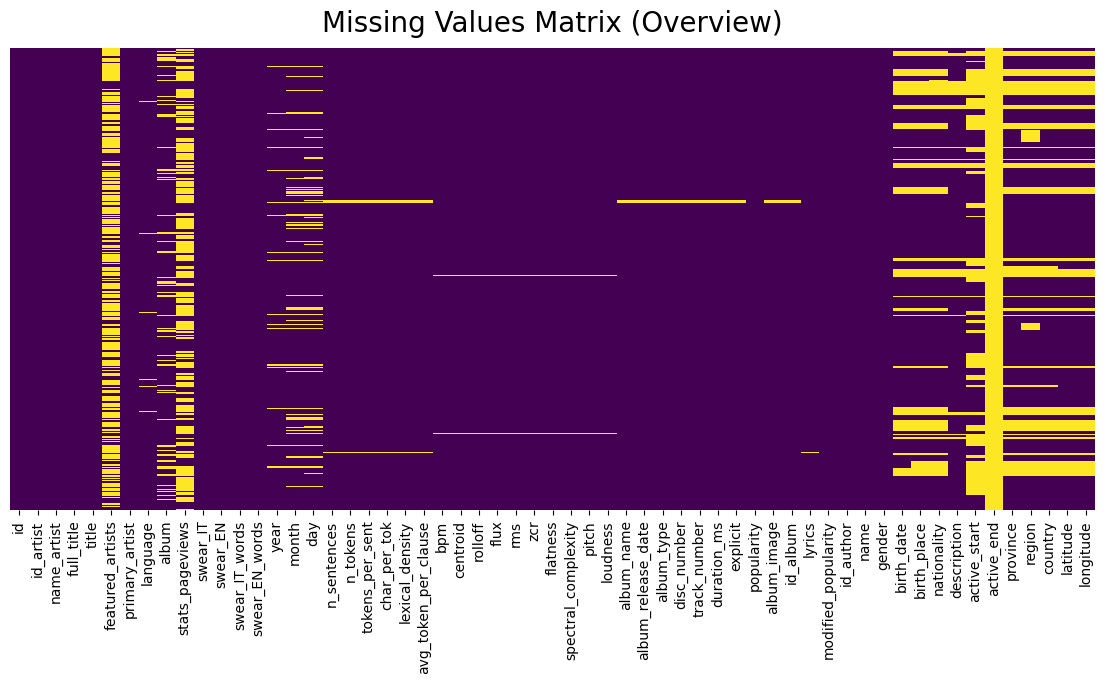

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Matrix (Overview)", fontsize=20, pad=12, color="#000000")
plt.show()



The following bar plot shows the percentage of missing values per feature, with the top 20 features that have the most missing data

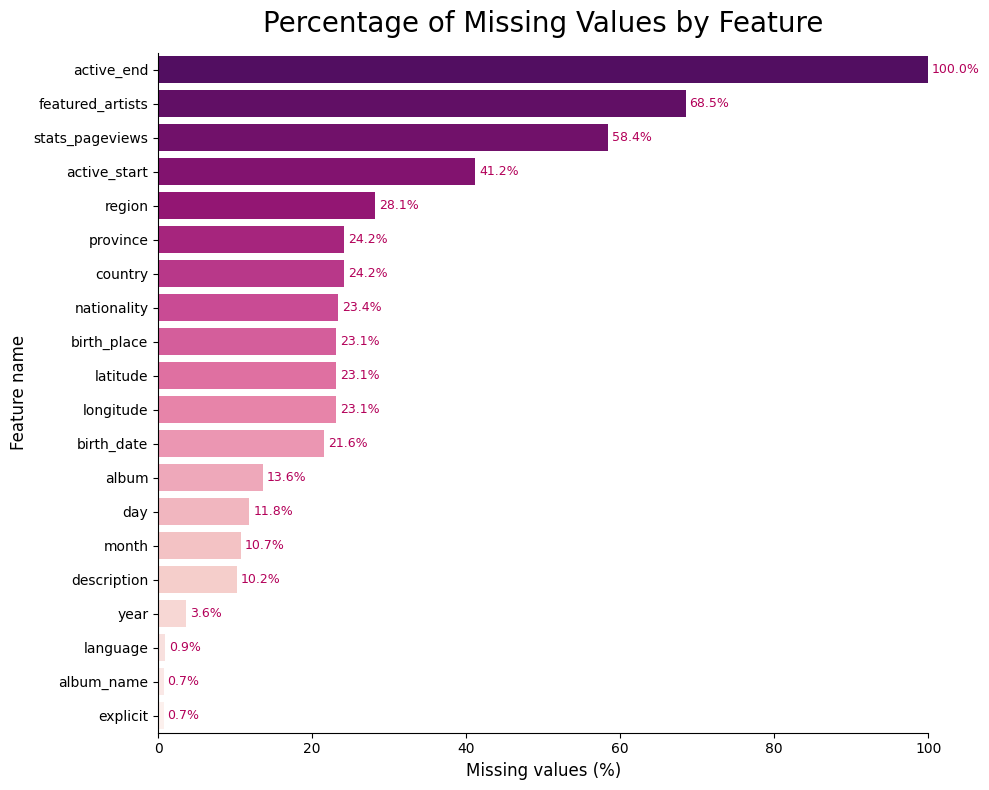

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=missing_df.head(20),
    x='missing_percent',
    y=missing_df.head(20).index,
    hue=missing_df.head(20).index,  
    palette='RdPu_r'  
)
plt.title("Percentage of Missing Values by Feature", fontsize=20, pad=15, color="#000000")
plt.xlabel("Missing values (%)", fontsize=12)
plt.ylabel("Feature name", fontsize=12)

# Etichette percentuali
for index, value in enumerate(missing_df.head(20)['missing_percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#b30059')

plt.xlim(0, 100)
sns.despine()
plt.tight_layout()
plt.show()

#### Missing Values Propagation After Merge

In [22]:
artists_missing = artists.isna().mean().sort_values(ascending=False) * 100
print(artists_missing)

active_end      100.000000
active_start     51.923077
region           34.615385
province         32.692308
country          32.692308
nationality      31.730769
birth_place      30.769231
latitude         30.769231
longitude        30.769231
birth_date       29.807692
description      17.307692
gender            0.000000
id_author         0.000000
name              0.000000
dtype: float64


The visualization highlights that missing values in attributes such as active_start, region, and birth_place have increased after merging due to the replication of incomplete artist metadata across multiple tracks.
This confirms that the merge process did not introduce new nulls, but propagated pre-existing ones.

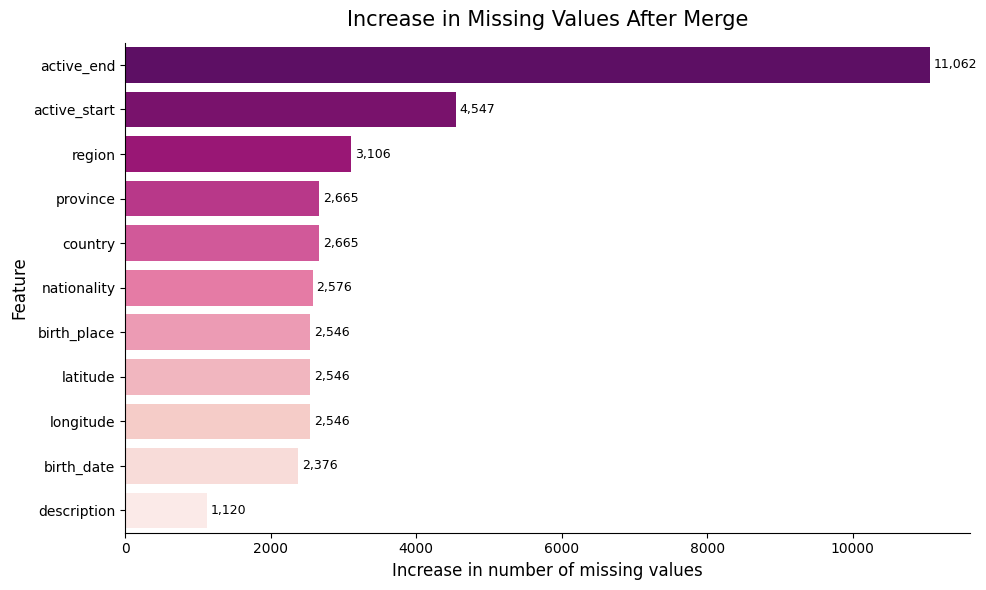

In [23]:
# Colonne provenienti dal dataset artists 
artist_cols =list(artists.columns)

# Conta i NaN prima e dopo il merge
missing_before = artists[artist_cols].isna().sum()
missing_after = df[artist_cols].isna().sum()

# Differenza assoluta e percentuale
missing_diff = missing_after - missing_before
increase_percent = (missing_diff / missing_before.replace(0, pd.NA)) * 100

# Tabella riepilogativa
missing_summary = (
    pd.DataFrame({
        "missing_before": missing_before,
        "missing_after": missing_after,
        "difference": missing_diff,
        "increase_%": increase_percent
    })
    .sort_values("difference", ascending=False)
)

plot_df = missing_summary[missing_summary['difference'] > 0].copy()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='difference',
    y=plot_df.index,
    hue=plot_df.index,
    palette='RdPu_r'
)
plt.title("Increase in Missing Values After Merge", fontsize=15, pad=12, color="#000000")
plt.xlabel("Increase in number of missing values", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Etichette numeriche a fianco delle barre
for index, value in enumerate(plot_df['difference']):
    plt.text(value + 50, index, f"{int(value):,}", va='center', fontsize=9, color="#000000")

sns.despine()
plt.tight_layout()
plt.show()

After analyzing the percentage of missing values in each column, We need to better understand the overall data quality before applying any filling strategies. Cleaning and validating the data first ensures that missing values are handled correctly and that no incorrect or misleading information is introduced during imputation.

## Data Quality

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

### Initial Data Cleaning

Based on the initial exploration of the dataset, we:

- **Removed empty column (`active_end`)** since it contained no useful information.  
- **Converted `popularity` and `year`** to numeric types to ensure consistency and enable statistical analysis.  
- **Transformed date-related columns** (`album_release_date`, `birth_date`, `active_start`, ) into proper datetime format for easier time-based operations.

Before directly converting year and popularity from objects to numeric and album_release_date, birth_date, and active_start from objects to datetime, we need to inspect the data to check if all values can be converted correctly and handle those that cannot be converted


In [25]:
# 1. Remove empty column
df.drop(columns=['active_end'], inplace=True)  # drop the 'active_end' column because it's empty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null  object 
 15  month              

#### Objects to Numeric
Inspecting the values in popularity and year columns to see the values that cannot be converted to numbers directly

In [26]:
import pandas as pd


numeric_cols = ['popularity','year']


# --- Check numeric columns ---
for col in numeric_cols:
    original = df[col].copy()
    converted = pd.to_numeric(original, errors='coerce')
    non_convertible = original[original.notna() & converted.isna()]
    
    print(f"\nColumn '{col}'  entries that cannot be converted to numeric:")
    if not non_convertible.empty:
        for idx, val in non_convertible.items():
            print(f"Row {idx}: {val}")
    else:
        print("All non-missing entries can be converted to numeric.")
    print('----------------------------------------------------------------')


Column 'popularity'  entries that cannot be converted to numeric:
Row 1932: AbnFbmOH
Row 2304: 549%
Row 3669: 692%
Row 3672: none
Row 3673: 950%
Row 3675: ub52Ztd2
Row 3676: 929%
Row 3677: none
Row 3684: 9642K
Row 3688: 8318K
Row 3692: NHpCq5Qn
Row 3693: 5108M
Row 3697: Tpig
Row 3701: unknown
Row 3702: 865%
Row 3706: 267%
Row 3707: 962%
Row 3710: 6917views
Row 3712: UVvsjaSS
Row 3715: 9356views
Row 3719: 318%
Row 3720: unknown
Row 3723: 2104views
Row 3731: 4742K
Row 3732: 4343views
Row 3734: 2505M
Row 3735: ebuFr
----------------------------------------------------------------

Column 'year'  entries that cannot be converted to numeric:
Row 681: nPmvFS
Row 787: MoKKcY
Row 1299: PdLLvs
Row 1443: Tr5ghq
Row 1456: FZM9N5
Row 1593: 3KBIhx
Row 1614: 7arrc9
Row 1782: 0S4bYq
Row 1790: Ww2RM0
Row 1792: YDWvPA
Row 2173: v9Gs4k
Row 3164: 1uWHmg
Row 3179: s7ujOB
Row 3608: CeZdpY
Row 4043: DkWnRx
Row 4479: oiiWuy
Row 4617: IlHfzv
Row 5025: uUsYUb
Row 5615: unxIUH
Row 6135: iW9Q9J
Row 6329: td0lg8



Looking at the values of the  `popularity` column, we noticed that some entries contained **non-numeric characters**, percent signs (`%`), abbreviations like `K` (thousands) or `M` (millions), and words such as `"views"` appended to the numbers.  

Instead of converting the column directly to numeric using pd.to_numeric(errors='coerce'), which would have turned all invalid entries into NaN, we applied a cleaning function to preserve and correctly interpret useful numeric information before conversion. The function:

- Removed non-numeric characters and words like `"views"` and `%`.
- Converted abbreviations (`K → 1,000`, `M → 1,000,000`) to numeric values.
- Extracted the first numeric part if extra text was present.
- Converted the cleaned values to floats, marking any remaining invalid entries as `NaN`.


In [27]:
import pandas as pd

def clean_popularity(value):
    if pd.isna(value):
        return None
    value_str = str(value).strip().lower()  # normalize
    
    # Remove common words like 'views'
    value_str = value_str.replace('views','').replace('%','').strip()
    value_str = value_str.lower()  
    # Handle K and M
    multiplier = 1
    if value_str.endswith('k'):
        multiplier = 1_000
        value_str = value_str[:-1]
    elif value_str.endswith('m'):
        multiplier = 1_000_000
        value_str = value_str[:-1]
    
    # Take only first token if words remain
    value_str = value_str.split()[0]
    
    # Try converting to float
    try:
        return (float(value_str) * multiplier)
    except:
        return None  # invalid entries become None/NaN
    
df['popularity'].apply(clean_popularity)




0        46.0
1        46.0
2        39.0
3        47.0
4        41.0
         ... 
11161    57.0
11162    24.0
11163    57.0
11164    37.0
11165    30.0
Name: popularity, Length: 11166, dtype: float64

Inspecting the values in the year column, we observed that while most entries were numerical, some contained unexpected or non-numeric characters. To handle this, we converted the column directly to a numeric type using pd.to_numeric() with the errors='coerce' parameter, which automatically transforms any invalid or non-numeric values into NaN.

In [28]:
df['year'] = pd.to_numeric(df['year'], errors='coerce') 

#### Objects to DateTime

Inspecting the values in 'album_release_date', 'birth_date', 'active_start' columns to see the values that cannot be converted to DateTime directly

In [29]:
date_cols = ['album_release_date', 'birth_date', 'active_start']
# --- Check date columns ---
for col in date_cols:
    original = df[col].copy()
    converted = pd.to_datetime(original, errors='coerce')
    non_convertible = original[original.notna() & converted.isna()]
    
    print(f"\nColumn '{col}'  entries that cannot be converted to datetime:")
    if not non_convertible.empty:
        for idx, val in non_convertible.items():
            print(f"Row {idx}: {val}")
    else:
        print("All non-missing entries can be converted to datetime.")
    print('----------------------------------------------------------------')


Column 'album_release_date'  entries that cannot be converted to datetime:
Row 283: 2013
Row 443: 1955
Row 1101: 2010
Row 1113: 2010
Row 1547: 2004
Row 1549: 2000
Row 1562: 2000
Row 1574: 1998
Row 1581: 2001
Row 1592: 2004
Row 1601: 2004
Row 1615: 2004
Row 1616: 2004
Row 1617: 2004
Row 1618: 2004
Row 1620: 2004
Row 1621: 2004
Row 1622: 2004
Row 1623: 1998
Row 1625: 2004
Row 1626: 1998
Row 1627: 2004
Row 1628: 2004
Row 1951: 1995
Row 1957: 1995
Row 1960: 1995
Row 1964: 1995
Row 1966: 1995
Row 1967: 1995
Row 1971: 1995
Row 1972: 1995
Row 1973: 1995
Row 1982: 1995
Row 2016: 2002
Row 2018: 2002
Row 2024: 2002
Row 2030: 2002
Row 2033: 2002
Row 2040: 2007
Row 2051: 2002
Row 2052: 2007
Row 2064: 2007
Row 2070: 2007
Row 2071: 2002
Row 2078: 2002
Row 2079: 2002
Row 2091: 2007
Row 2096: 2002
Row 2098: 2002
Row 2103: 2007
Row 2107: 2002
Row 2109: 2007
Row 2118: 2002
Row 2121: 2007
Row 2126: 2002
Row 2127: 2007
Row 2132: 2007
Row 2134: 2007
Row 2143: 2002
Row 2147: 2007
Row 2157: 2007
Row 2162: 2

Looking at the values in the album_release_date column that could not be converted to datetime, we noticed that many of them were just years (e.g., "2004"). If we used pd.to_datetime(errors='coerce') directly, these entries would have been turned into NaT. However, we wanted to keep this information by assigning a default month and day — the first day of the year.

- Instead of converting the column directly, we applied a cleaning function that:

- Detected values that were only a year (e.g., "2004") and changed them to a full date ("2004-01-01").

- Kept valid full dates (e.g., "2021-04-09") unchanged.

- Left missing values as they are.

- Finally, converted everything into proper datetime format for consistency.

In [30]:
import pandas as pd
import re

def fix_year_only_dates(val):
    """
    If the value looks like a 4-digit year, convert it to 'YYYY-01-01'.
    Otherwise, return the original value.
    """
    if pd.isna(val):
        return val
    val_str = str(val).strip()
    if re.fullmatch(r'\d{4}', val_str):
        return f"{val_str}-01-01"
    return val_str

# Apply to album_release_date
df['album_release_date'] = df['album_release_date'].apply(fix_year_only_dates)

# Convert to datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11166 non-null  object        
 1   id_artist             11166 non-null  object        
 2   name_artist           11166 non-null  object        
 3   full_title            11166 non-null  object        
 4   title                 11166 non-null  object        
 5   featured_artists      3517 non-null   object        
 6   primary_artist        11166 non-null  object        
 7   language              11061 non-null  object        
 8   album                 9652 non-null   object        
 9   stats_pageviews       4642 non-null   float64       
 10  swear_IT              11166 non-null  int64         
 11  swear_EN              11166 non-null  int64         
 12  swear_IT_words        11166 non-null  object        
 13  swear_EN_words  

Based on the values that could not be converted to datetime, we found that the birth_date column contained several invalid entries, such as URLs (e.g., "http://www.wikidata.org/.well-known/genid/...") instead of actual dates. Since these values do not represent meaningful or recoverable information, there is nothing worth preserving. Therefore, we are going to apply the pd.to_datetime(errors='coerce') function directly, allowing all invalid entries to be converted to NaT.

For the active_start column, all non-missing entries are  already in a valid date format, so they are going to be  successfully converted to datetime without any issues.

In [31]:


date_cols = ['birth_date', 'active_start', ]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # convert to datetime, invalid dates become NaT


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    11166 non-null  object        
 1   id_artist             11166 non-null  object        
 2   name_artist           11166 non-null  object        
 3   full_title            11166 non-null  object        
 4   title                 11166 non-null  object        
 5   featured_artists      3517 non-null   object        
 6   primary_artist        11166 non-null  object        
 7   language              11061 non-null  object        
 8   album                 9652 non-null   object        
 9   stats_pageviews       4642 non-null   float64       
 10  swear_IT              11166 non-null  int64         
 11  swear_EN              11166 non-null  int64         
 12  swear_IT_words        11166 non-null  object        
 13  swear_EN_words  

### Data Distribution
The following table and histogram show the numerical data distribution in the dataset:

- **Most features** (`n_sentences`, `n_tokens`, `tokens_per_sent`, `char_per_tok`, `lexical_density`, `avg_token_per_clause`, `centroid`, `rolloff`, `rms`, `zcr`, `flatness`, `flux`, `spectral_complexity`, `pitch`, `loudness`) show **bell-shaped or near-normal distributions**.

- **Highly skewed features** (`stats_pageviews`, `bpm`, `tokens_per_sent`, `duration_ms`, `popularity`) have a **long right tail**, indicating a few extreme values or outliers (common in popularity or count-based features).

- **Temporal features** (`year`, `month`, `day`) display **non-uniform distributions**; e.g., `year` is concentrated around recent decades, showing most songs are modern.

- **Geographical features** (`latitude`, `longitude`) have **peaks corresponding to specific locations**, likely representing where artists or tracks are clustered.


,count,mean,std,min,25%,50%,75%,max
stats_pageviews,4642.000000,36993.646919,58406.564657,5006.000000,9642.250000,19099.500000,42011.750000,1971207.000000
swear_IT,11166.000000,2.343006,3.704831,0.000000,0.000000,1.000000,3.000000,72.000000
swear_EN,11166.000000,0.711177,2.555423,0.000000,0.000000,0.000000,0.000000,72.000000
year,10728.000000,2012.651286,33.288337,1900.000000,2009.000000,2016.000000,2021.000000,2100.000000
month,9969.000000,6.198515,3.482992,1.000000,3.000000,6.000000,10.000000,12.000000
day,9843.000000,15.808697,8.881989,1.000000,9.000000,16.000000,23.000000,31.000000
n_sentences,11090.000000,59.399639,24.711996,1.000000,46.000000,58.000000,73.000000,437.000000
n_tokens,11090.000000,496.891253,209.187612,3.000000,372.000000,491.000000,615.000000,3089.000000
tokens_per_sent,11090.000000,8.672152,5.675602,1.500000,7.333333,8.404762,9.431527,400.000000
char_per_tok,11090.000000,4.054416,0.445958,2.000000,3.866946,4.012709,4.168686,12.000000


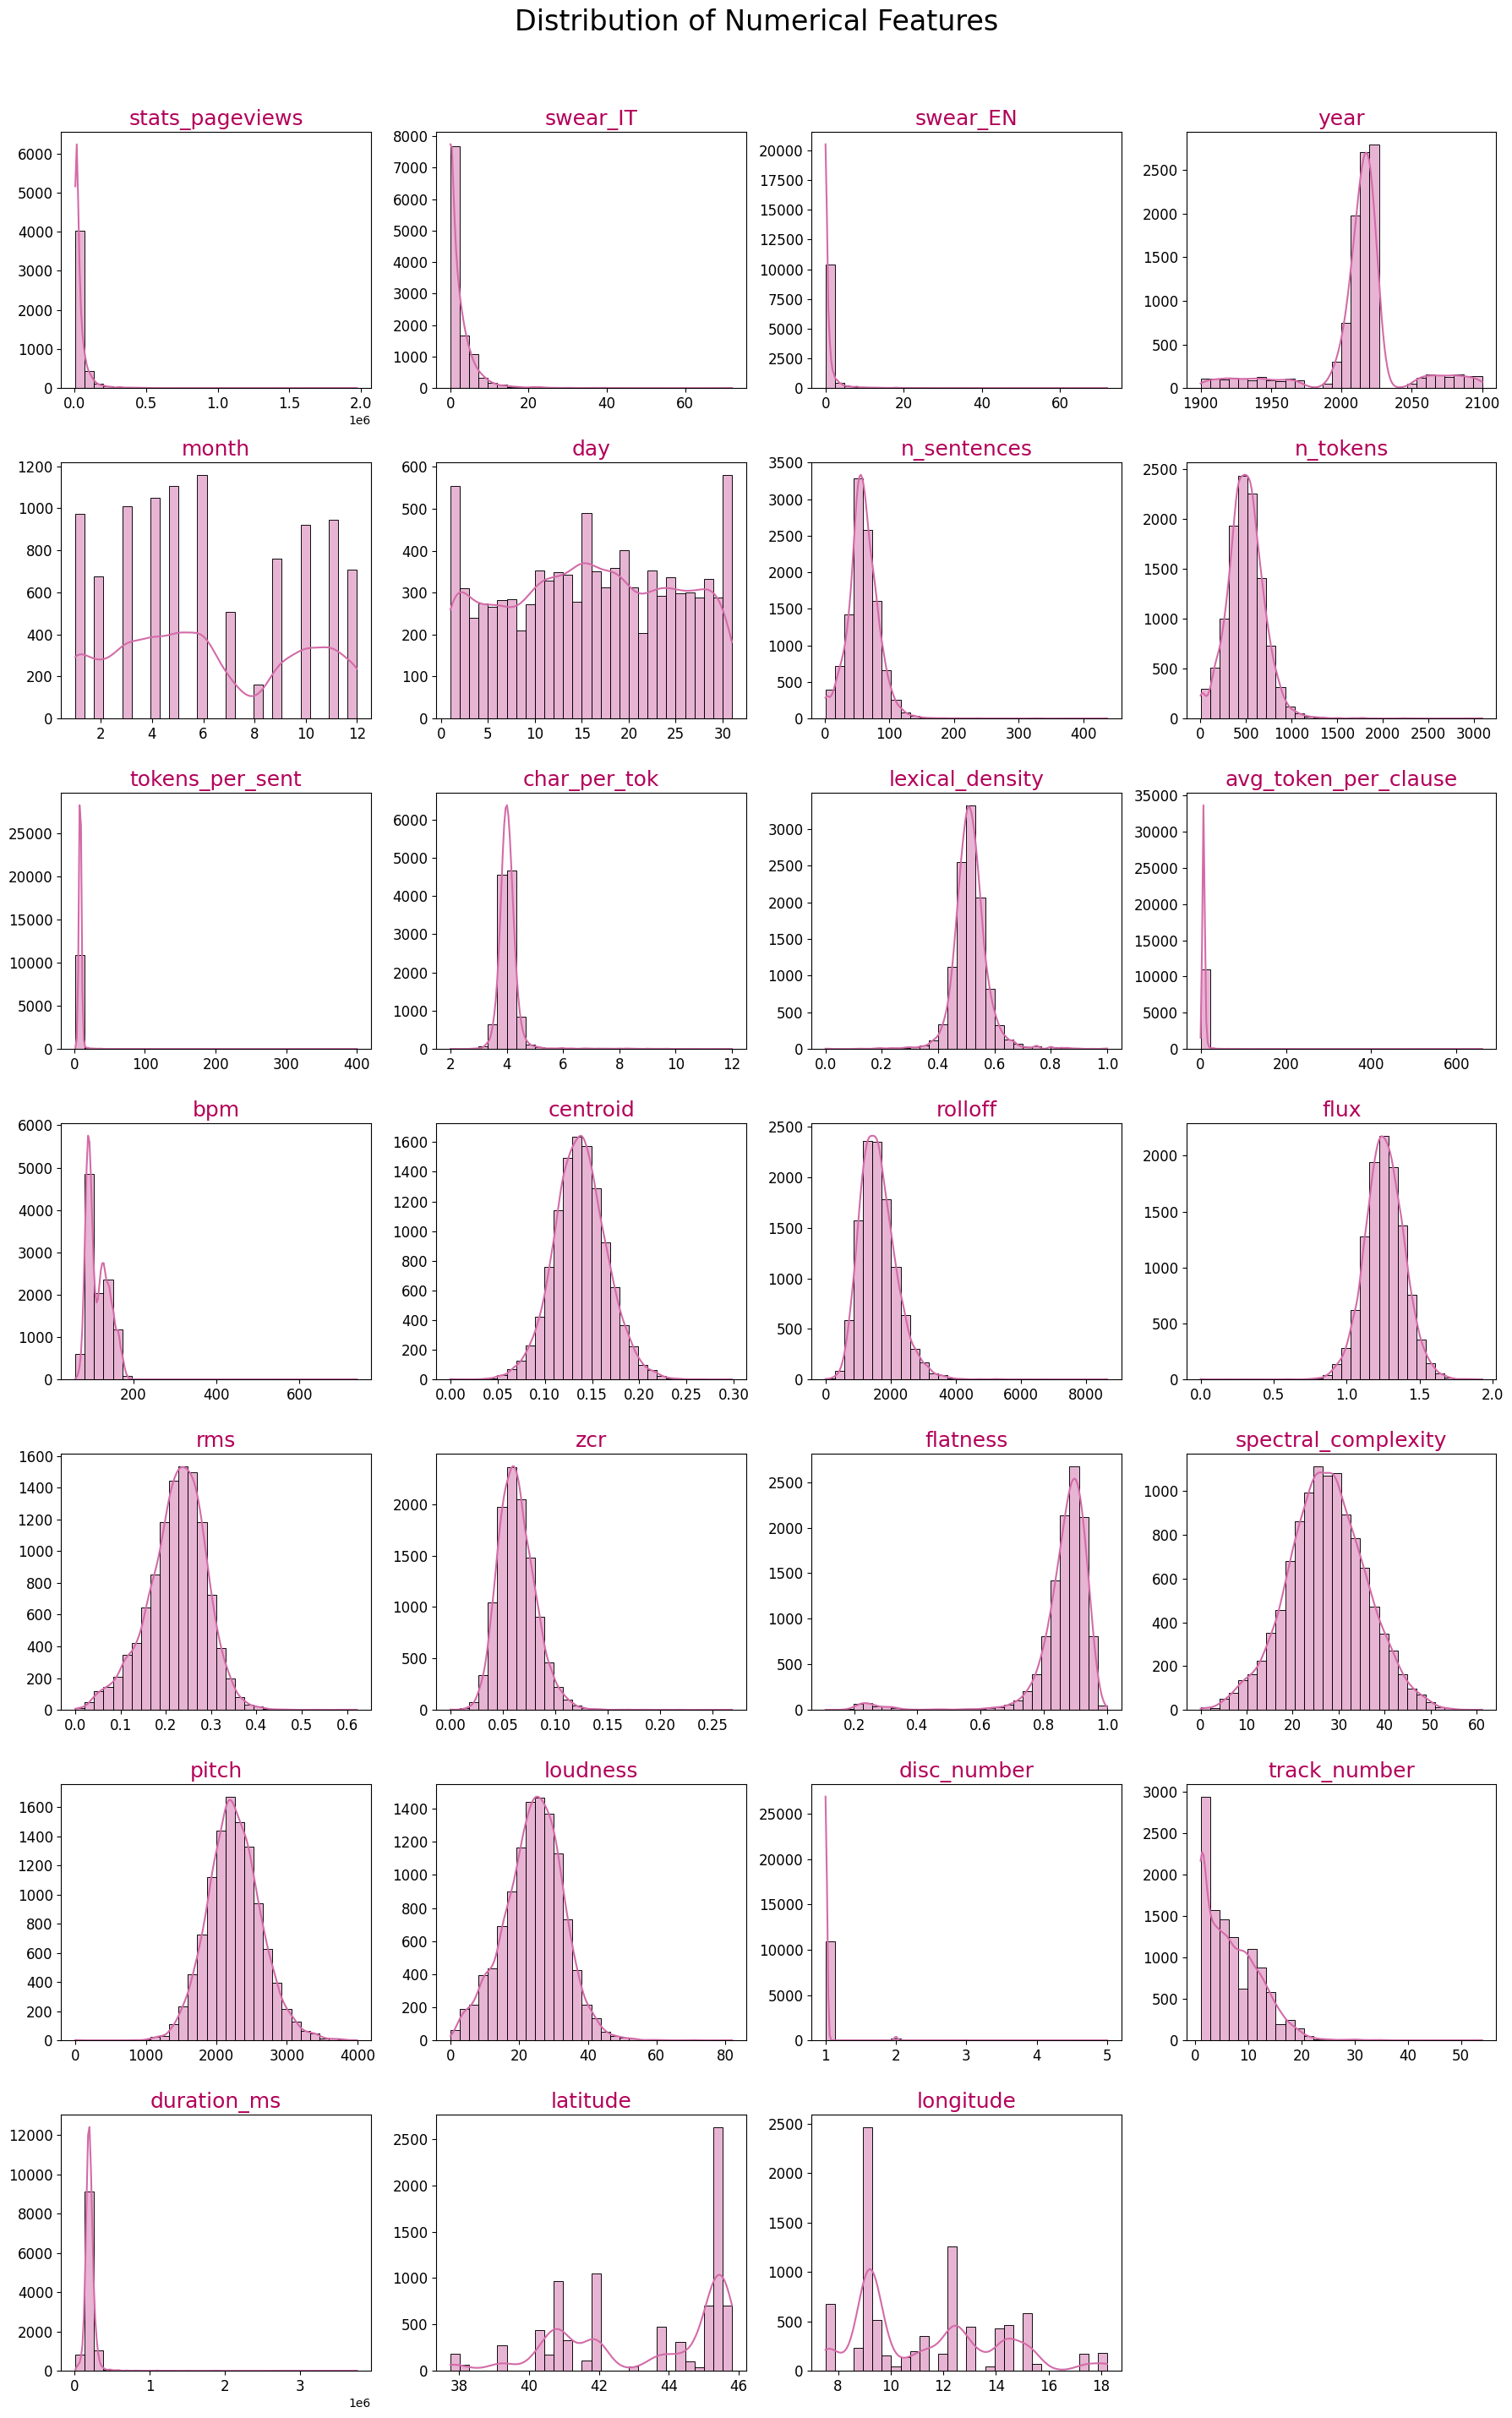

In [32]:

# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# --- Summary statistics table ---
display(df[num_cols].describe().T.style.background_gradient(cmap='RdPu'))

# --- Histograms for each numeric column ---
n_cols = 4
n_rows = -(-len(num_cols) // n_cols)  # ceil division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), bins=30, kde=True, color="#d36ba8", ax=axes[i])
    axes[i].set_title(col, fontsize=18, color="#b30059")   # larger title font
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='both', labelsize=12)          # larger tick labels

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribution of Numerical Features", fontsize=24, color="#000000", y=1.02)  # larger main title
plt.tight_layout()
plt.show()



The data distribution and the statistics presented above reveal some anomalies and irregularities in the dataset. These issues will be examined and addressed in the following section.


###  Features Inspection Anomalies Detection

#### Track Year and Album release date
Looking at the distribution of values in the track year in the previous section, we notice some entries before 1950 and after 2025, which don’t make much sense. Similarly, there are album release dates after 2025 that seem unrealistic. Therefore, we will investigate these cases further to understand the cause and decide how to correct them.

The following code groups songs and albums into 20-year intervals based on their release years and visualizes the percentage distribution in each range. It first cleans and converts the year fields, then calculates how many songs or albums fall into each 20-year period.

Result:
From the plots, we can see that more than half of the songs and albums were released between 2000 and 2020, indicating that most of the data comes from the recent two decades

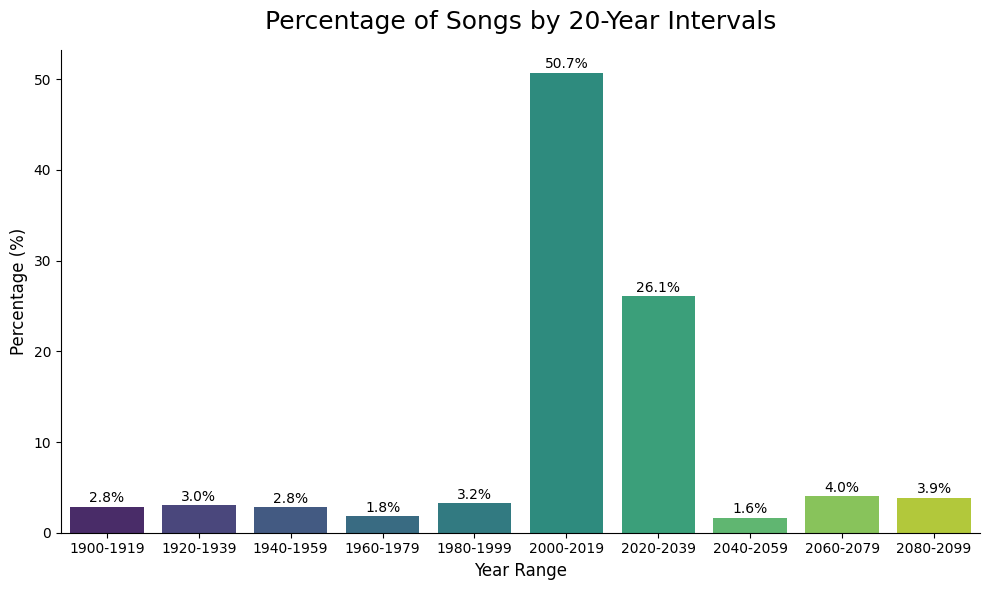

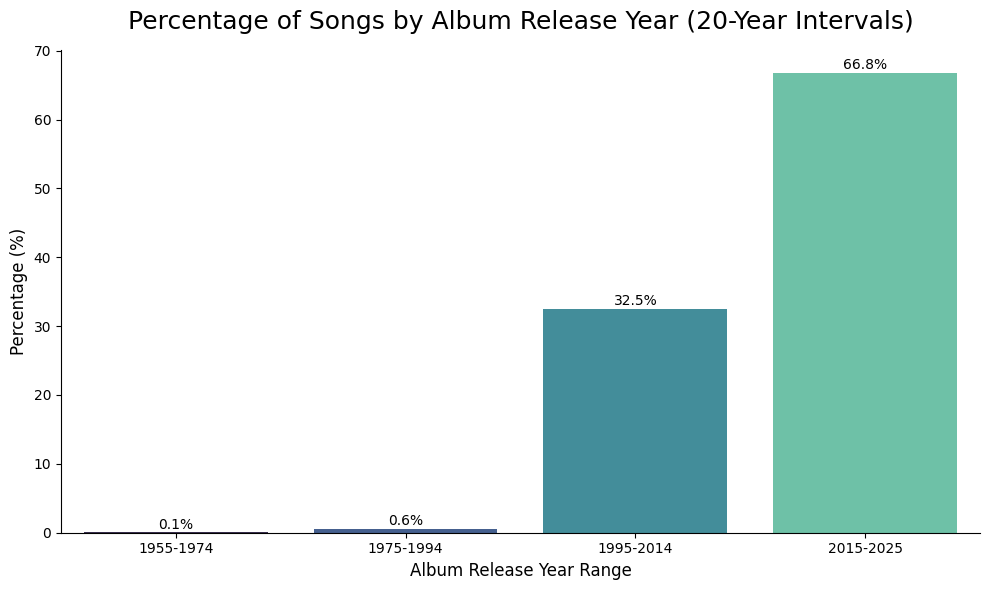

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Convert 'year' to numeric ---
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# --- Drop missing years and make a copy ---
df_years = df.dropna(subset=['year']).copy()

# --- Create 20-year bins ensuring last bin includes the max year ---
start = int(df_years['year'].min())
end = int(df_years['year'].max())
bins = list(range(start, end, 20)) + [end]  # ensure last bin ends exactly at max
labels = [f"{b}-{min(b+19, end)}" for b in bins[:-1]]

df_years['year_group'] = pd.cut(df_years['year'], bins=bins, labels=labels, right=False)

# --- Calculate percentage per group ---
group_percent = df_years['year_group'].value_counts(normalize=True).sort_index() * 100
group_df = pd.DataFrame({'year_group': group_percent.index, 'percent': group_percent.values})

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=group_df, x='year_group', y='percent', hue='year_group', palette='viridis', legend=False)

# --- Add percentage labels ---
for i, val in enumerate(group_df['percent']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Percentage of Songs by 20-Year Intervals", fontsize=18, pad=15)
plt.xlabel("Year Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


# --- Convert 'album_release_date' to datetime and extract year ---
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df['album_year'] = df['album_release_date'].dt.year

# --- Drop missing album years and make a copy ---
df_album_years = df.dropna(subset=['album_year']).copy()

# --- Create 20-year bins ensuring last bin includes the max year ---
start = int(df_album_years['album_year'].min())
end = int(df_album_years['album_year'].max())
bins = list(range(start, end, 20)) + [end]
labels = [f"{b}-{min(b+19, end)}" for b in bins[:-1]]

df_album_years['album_year_group'] = pd.cut(df_album_years['album_year'], bins=bins, labels=labels, right=False)

# --- Calculate percentage per group ---
group_percent = df_album_years['album_year_group'].value_counts(normalize=True).sort_index() * 100
group_df = pd.DataFrame({'album_year_group': group_percent.index, 'percent': group_percent.values})

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=group_df, x='album_year_group', y='percent', hue='album_year_group', palette='mako', legend=False)

for i, val in enumerate(group_df['percent']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Percentage of Songs by Album Release Year (20-Year Intervals)", fontsize=18, pad=15)
plt.xlabel("Album Release Year Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


Descriptive Statistics
The summary statistics show that the song release years range from 1900 to 2100, with an average around 2013, indicating some unrealistic future values.
For album release years, the range is 1962 to 2025, with an average around 2017, which is more reasonable and reflects that most albums were released in the last decade.

In [ ]:
# For the 'year' column
print(df['year'].describe())  

# For 'album_release_date' (datetime type)
df['album_release_year'] = df['album_release_date'].dt.year
print(df['album_release_year'].describe())

count    10728.000000
mean      2012.651286
std         33.288337
min       1900.000000
25%       2009.000000
50%       2016.000000
75%       2021.000000
max       2100.000000
Name: year, dtype: float64
count    10827.000000
mean      2016.765586
std          6.866634
min       1962.000000
25%       2013.000000
50%       2018.000000
75%       2022.000000
max       2025.000000
Name: album_release_year, dtype: float64


Number of Songs before 1950 and after 2025 

In [97]:
# Count songs released before 1950 and after 2025
songs_before_1950 = tracks[tracks['year'] < 1950].shape[0]
songs_after_2025 = tracks[tracks['year'] > 2025].shape[0]

print(f"Number of songs before 1950: {songs_before_1950}")
# Filter songs with year > 2025
future_songs = tracks[tracks['year'] <1950 ][['full_title', 'album_release_date', 'year']]
# Display the results
display(future_songs)

print(f"Number of songs after 2025: {songs_after_2025}")
# Filter songs with year > 2025
future_songs = tracks[tracks['year'] > 2025][['full_title', 'album_release_date', 'year']]
# Display the results
display(future_songs)


Number of songs before 1950: 790


,full_title,album_release_date,year
22,Freestyle #redbullnext #essemagazine by Rosa C...,2025-05-16,1917.0
29,Sono Io !! by Rosa Chemical,2019-03-08,1920.0
34,ALIENO by Rosa Chemical,2020-01-17,1901.0
58,LATTE + by Rosa Chemical (Ft. HEAVEN (ITA)),2020-10-02,1933.0
59,I need some sleep (Intro) by Rosa Chemical,2023-06-09,1928.0
...,...,...,...
11129,Quello Che Deve Arrivare (Arriva Arriva) by Ma...,2008-01-01,1913.0
11147,Esagero (Provino) by Marracash,2016-01-22,1947.0
11156,Chi sale sul ring (Sigla MTV Spit) by Marracash,2014-09-23,1947.0
11158,Crack (Provino) by Marracash,2016-01-22,1922.0


Number of songs after 2025: 1036


,full_title,album_release_date,year
6,LOBBY WAY by Rosa Chemical,2020-05-28,2072.0
7,SLATT by Rosa Chemical (Ft. Dani Faiv),2020-05-28,2098.0
35,Teschio by Rosa Chemical,2019-03-08,2052.0
48,TIPO DI N by Rosa Chemical,2025-05-16,2081.0
53,Dovreicomprarmiunacollanacomeimigos by Rosa Ch...,2020-10-02,2060.0
...,...,...,...
11115,Myspace Freestyle 2008 by Marracash,2018-06-22,2060.0
11118,La Danza della Pioggia by Marracash,2008-01-01,2095.0
11119,In Down by Marracash,2011-01-01,2080.0
11131,La tipa del tipo by Marracash & TY1,2013-01-01,2076.0


In [94]:
import pandas as pd


cutoff_after = pd.to_datetime("2025-01-01")

album_release_date_after_2025 = tracks[tracks['album_release_date'] > cutoff_after].shape[0]

print(f"Number of album_release_date after 2025: {album_release_date_after_2025}")


Number of album_release_date after 2025: 804


#### Artist's BirthDate

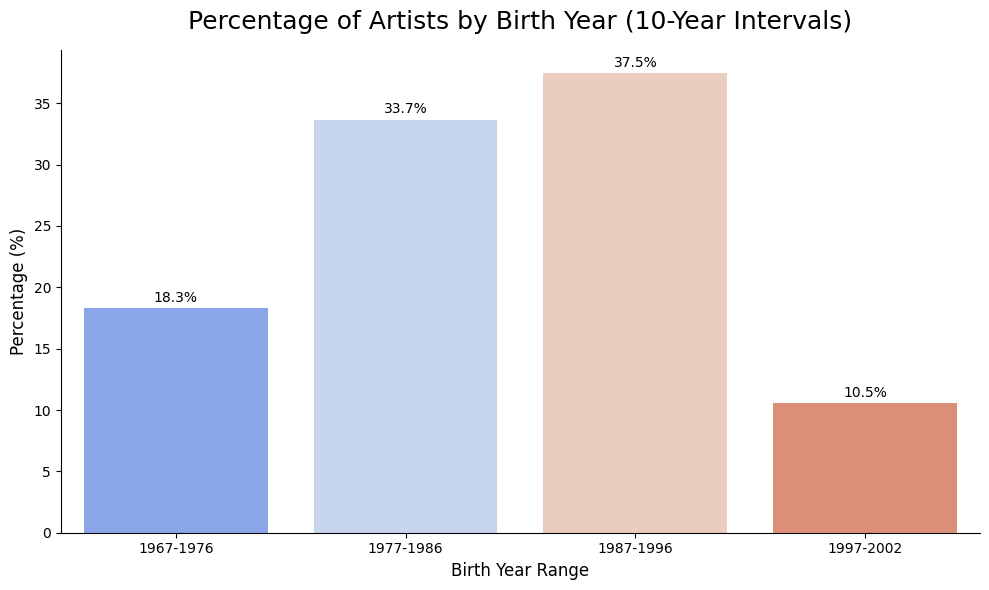

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['birth_year'] = df['birth_date'].dt.year

# --- Drop missing birth years and make a copy ---
df_birth_years = df.dropna(subset=['birth_year']).copy()

# --- Create 20-year bins ensuring last bin includes the max year ---
start = int(df_birth_years['birth_year'].min())
end = int(df_birth_years['birth_year'].max())
bins = list(range(start, end, 10)) + [end]
labels = [f"{b}-{min(b+9, end)}" for b in bins[:-1]]

df_birth_years['birth_year_group'] = pd.cut(df_birth_years['birth_year'], bins=bins, labels=labels, right=False)

# --- Calculate percentage per group ---
group_percent = df_birth_years['birth_year_group'].value_counts(normalize=True).sort_index() * 100
group_df = pd.DataFrame({'birth_year_group': group_percent.index, 'percent': group_percent.values})

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=group_df, x='birth_year_group', y='percent', hue='birth_year_group', palette='coolwarm', legend=False)

# --- Add percentage labels ---
for i, val in enumerate(group_df['percent']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Percentage of Artists by Birth Year (10-Year Intervals)", fontsize=18, pad=15)
plt.xlabel("Birth Year Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


#### Active start

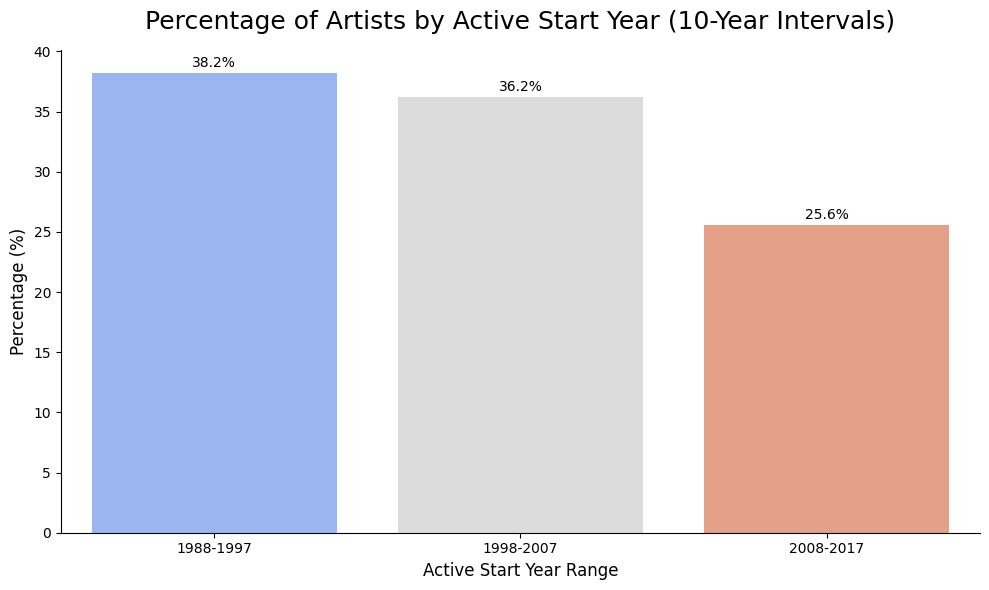

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['active_start_year'] = df['active_start'].dt.year

# --- Drop missing active_start years and make a copy ---
df_active_years = df.dropna(subset=['active_start_year']).copy()

# --- Create 10-year bins ensuring last bin includes the max year ---
start = int(df_active_years['active_start_year'].min())
end = int(df_active_years['active_start_year'].max())
bins = list(range(start, end, 10)) + [end]
labels = [f"{b}-{min(b+9, end)}" for b in bins[:-1]]

df_active_years['active_year_group'] = pd.cut(df_active_years['active_start_year'], bins=bins, labels=labels, right=False)

# --- Calculate percentage per group ---
group_percent = df_active_years['active_year_group'].value_counts(normalize=True).sort_index() * 100
group_df = pd.DataFrame({'active_year_group': group_percent.index, 'percent': group_percent.values})

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=group_df, x='active_year_group', y='percent', hue='active_year_group', palette='coolwarm', legend=False)

# --- Add percentage labels ---
for i, val in enumerate(group_df['percent']):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=10)

plt.title("Percentage of Artists by Active Start Year (10-Year Intervals)", fontsize=18, pad=15)
plt.xlabel("Active Start Year Range", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


#### Popularity

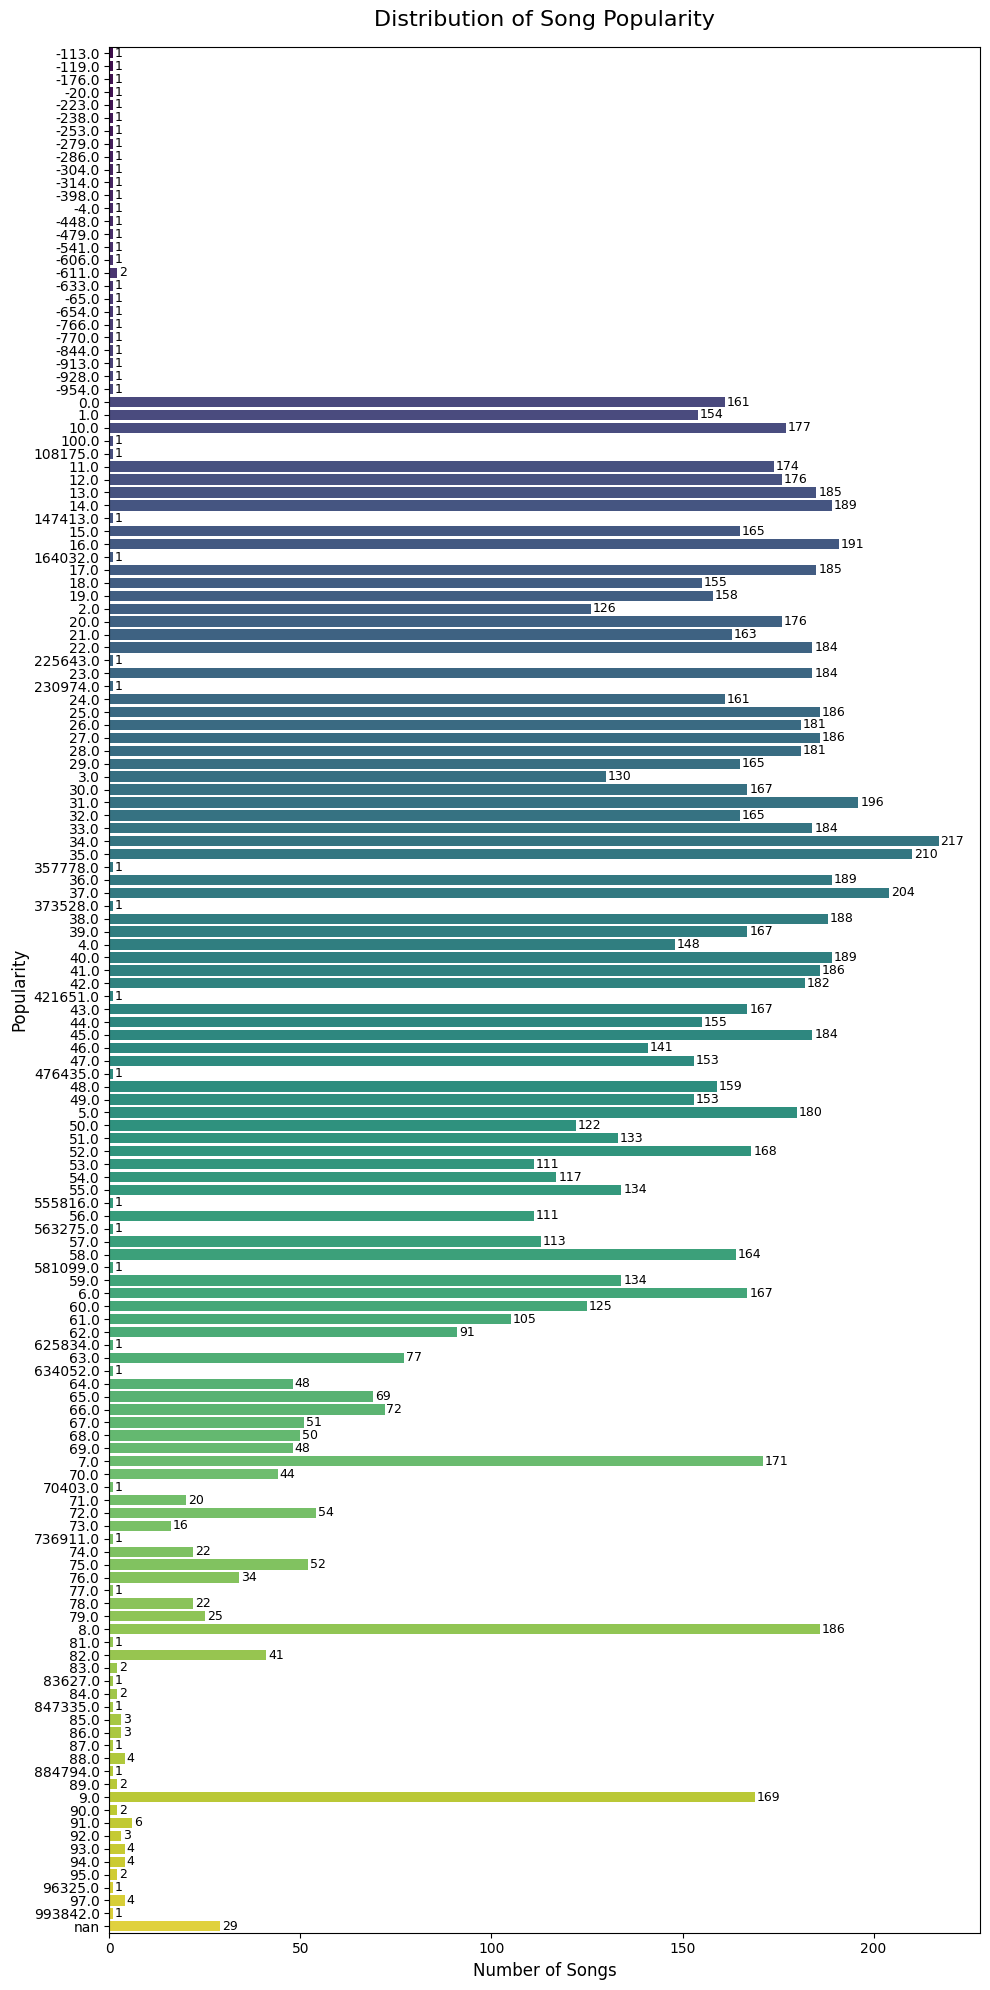

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Count popularity values ---
pop_counts = (df['popularity'].astype(str)).value_counts().sort_index()  # sort index for ascending y-axis

# --- Horizontal bar plot ---
plt.figure(figsize=(10, 20))
sns.barplot(x=pop_counts.values, y=pop_counts.index,hue=pop_counts.index, palette='viridis')
plt.xlabel("Number of Songs", fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Distribution of Song Popularity", fontsize=16, pad=15)

# --- Add count labels ---
for i, val in enumerate(pop_counts.values):
    plt.text(val + 0.5, i, f"{val}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


####  Artists Location Statistics


##### Checking if all the coordinates of the artists are inside italy's coordinates

In [36]:
geo_outliers = df[(df['latitude'] < 35.5) | (df['latitude'] > 47.1) |
                  (df['longitude'] < 6.6) | (df['longitude'] > 18.5)]
print(f"Number of Geographic coordinates outside Italy range: {len(geo_outliers)} records")
display(geo_outliers[['name_artist', 'latitude', 'longitude', 'birth_place']].head(10))

Number of Geographic coordinates outside Italy range: 0 records


,name_artist,latitude,longitude,birth_place


##### Artists' Country Values

All the countries have the value of Italia

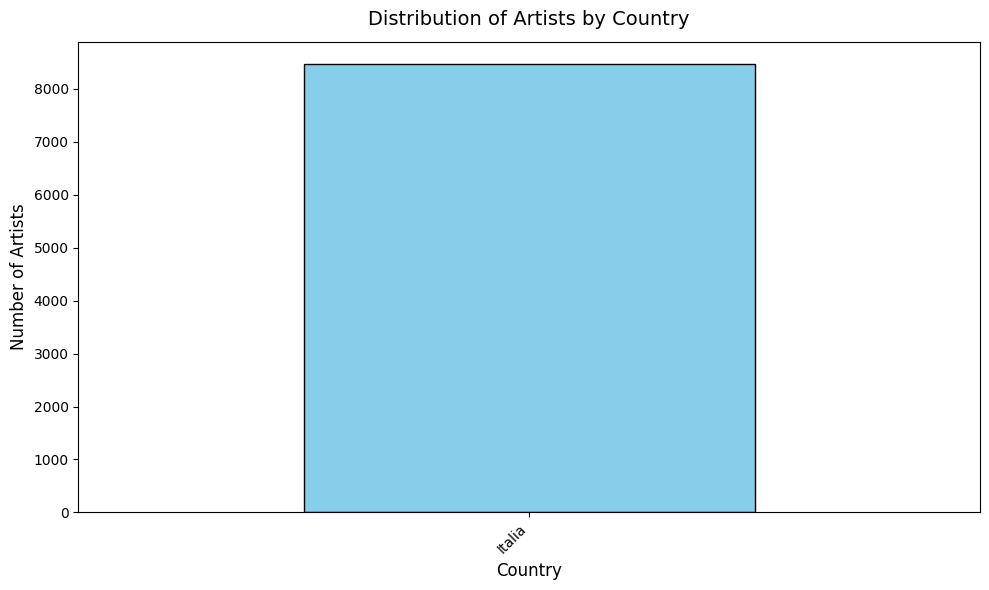

In [37]:
import matplotlib.pyplot as plt

# Count the occurrences of each country
country_counts = df['country'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Artists by Country', fontsize=14, pad=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Artists', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##### Checking if there is an artist his/her country not Italy but his/her coordinates are in Italy

In [38]:
import pandas as pd

# Filter rows where country is not Italy and coordinates are present
non_italy_with_coords = df[
    (df['country'].notna()) & 
    (df['country'] != "Italia") & 
    (df['latitude'].notna()) & 
    (df['longitude'].notna())
]

# Count the number of such records
num_records = len(non_italy_with_coords)
print(f"Number of non-Italy records with coordinates: {num_records}")

# Show the records
print(non_italy_with_coords[['country', 'latitude', 'longitude']])


Number of non-Italy records with coordinates: 0
Empty DataFrame
Columns: [country, latitude, longitude]
Index: []


##### Artists Nationality Distribution

Almost all artists are Italian (99.5%), with a small minority from Argentina (0.5%).

nationality
Italia       8517
Argentina      40
Name: count, dtype: int64


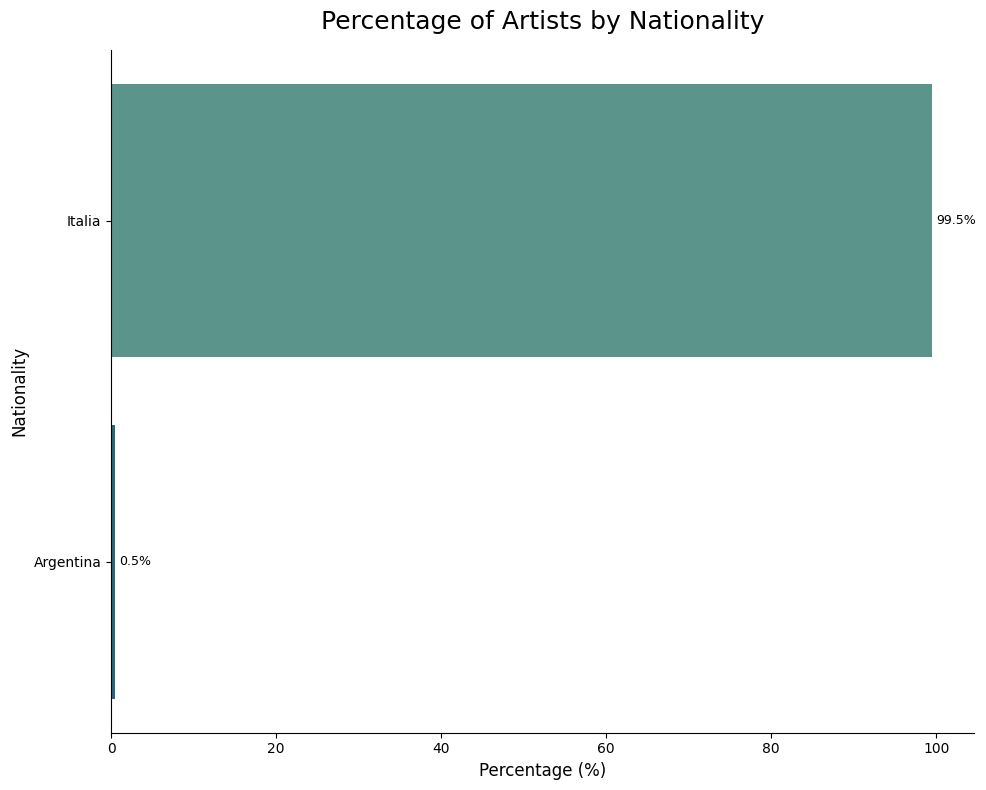

In [39]:

print(df['nationality'].value_counts())
# Count and calculate percentages
nat_counts = df['nationality'].value_counts()
nat_percent = (nat_counts / nat_counts.sum()) * 100
nat_df = nat_percent.reset_index()
nat_df.columns = ['nationality', 'percent']

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    data=nat_df.head(20),  # show top 20 nationalities
    x='percent',
    y='nationality',
    hue='nationality',
    palette='crest',
    dodge=False
)

plt.title("Percentage of Artists by Nationality", fontsize=18, pad=15)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Nationality", fontsize=12)

# Add percentage labels
for index, value in enumerate(nat_df.head(20)['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, nat_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()


##### Checking if there are artists with Non-Italian Nationality and Italian Coordinates (doubt)

There are 40 artists with a nationality other than Italian (all Argentinian) but also have italian geographic coordinates. All these 40 artists share the same coordinates (After searching for this coordinates refers to the province of Parma).

In [40]:
import pandas as pd

# Filter rows where country is not Italy and coordinates are present
non_italy_with_coords = df[
    (df['nationality'].notna()) & 
    (df['nationality'] != "Italia") & 
    (df['latitude'].notna()) & 
    (df['longitude'].notna())
]

# Count the number of such records
num_records = len(non_italy_with_coords)
print(f"Number of non-Italy Nationality records with coordinates: {num_records}")

# Show the records
print(non_italy_with_coords[['nationality','latitude', 'longitude']])


Number of non-Italy Nationality records with coordinates: 40
     nationality   latitude  longitude
8148   Argentina  44.803741  10.143004
8149   Argentina  44.803741  10.143004
8150   Argentina  44.803741  10.143004
8151   Argentina  44.803741  10.143004
8152   Argentina  44.803741  10.143004
8153   Argentina  44.803741  10.143004
8154   Argentina  44.803741  10.143004
8155   Argentina  44.803741  10.143004
8156   Argentina  44.803741  10.143004
8157   Argentina  44.803741  10.143004
8158   Argentina  44.803741  10.143004
8159   Argentina  44.803741  10.143004
8160   Argentina  44.803741  10.143004
8161   Argentina  44.803741  10.143004
8162   Argentina  44.803741  10.143004
8163   Argentina  44.803741  10.143004
8164   Argentina  44.803741  10.143004
8165   Argentina  44.803741  10.143004
8166   Argentina  44.803741  10.143004
8167   Argentina  44.803741  10.143004
8168   Argentina  44.803741  10.143004
8169   Argentina  44.803741  10.143004
8170   Argentina  44.803741  10.143004
817

##### Nationality and Country Coherence Check  (doubt)

This check ensures that each artist’s nationality matches the country. For example, artists from Italy should have nationality Italia, and those from Argentine should have Argentina.
The results show no mismatches, meaning all records have consistent country–nationality relationships.

In [41]:

# Example mapping of country → expected nationality
country_to_nationality = {
    "Italy": "Italia",
    "Argentine": "Argentina",
}


# Function to check nationality vs country
def check_nationality_country(row):
    if pd.notna(row['country']) and pd.notna(row['nationality']):
        expected_nationality = country_to_nationality.get(row['country'])
        if expected_nationality and expected_nationality != row['nationality']:
            return True  # incoherent
    return False  # coherent or missing data

# Apply the function
df['nationality_country_mismatch'] = df.apply(check_nationality_country, axis=1)

# Count mismatches
num_mismatches = df['nationality_country_mismatch'].sum()
print(f"Number of nationality-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['nationality_country_mismatch']]
print(mismatched_records[['country', 'nationality']])


Number of nationality-country mismatches: 0
Empty DataFrame
Columns: [country, nationality]
Index: []


##### Distribution of Artist's Birth Places

The majority of artists were born in major Italian cities, with Milano (1,843) and Roma (1,048) being the most frequent birthplaces, indicating a strong concentration of artists from these cultural and economic centers.

Smaller Italian towns such as Senigallia (443), Torino (397), and Avellino (329) also show notable representation, suggesting a widespread national distribution beyond just the biggest cities.

Only a few artists were born outside Italy — such as Buenos Aires (40) and Almería (26) — representing less than 1% of the total, which confirms that the dataset is predominantly composed of Italian-born artists.

birth_place
Milano                      1843
Roma                        1048
Senigallia                   443
Torino                       397
Avellino                     329
Cagliari                     274
Salerno                      255
Olbia                        252
Napoli                       241
Vimercate                    237
Vicenza                      220
Verona                       194
Scampia                      187
Nicosia                      182
Sternatia                    180
Padova                       174
Grottaglie                   170
La Spezia                    154
Scafati                      148
Nocera Inferiore             136
Sesto San Giovanni           136
Genova                       135
Alpignano                    132
Fiumicino                    106
Treviso                      105
Bologna                       99
San Siro                      85
Singapore                     81
Rho                           79
Brescia                       7

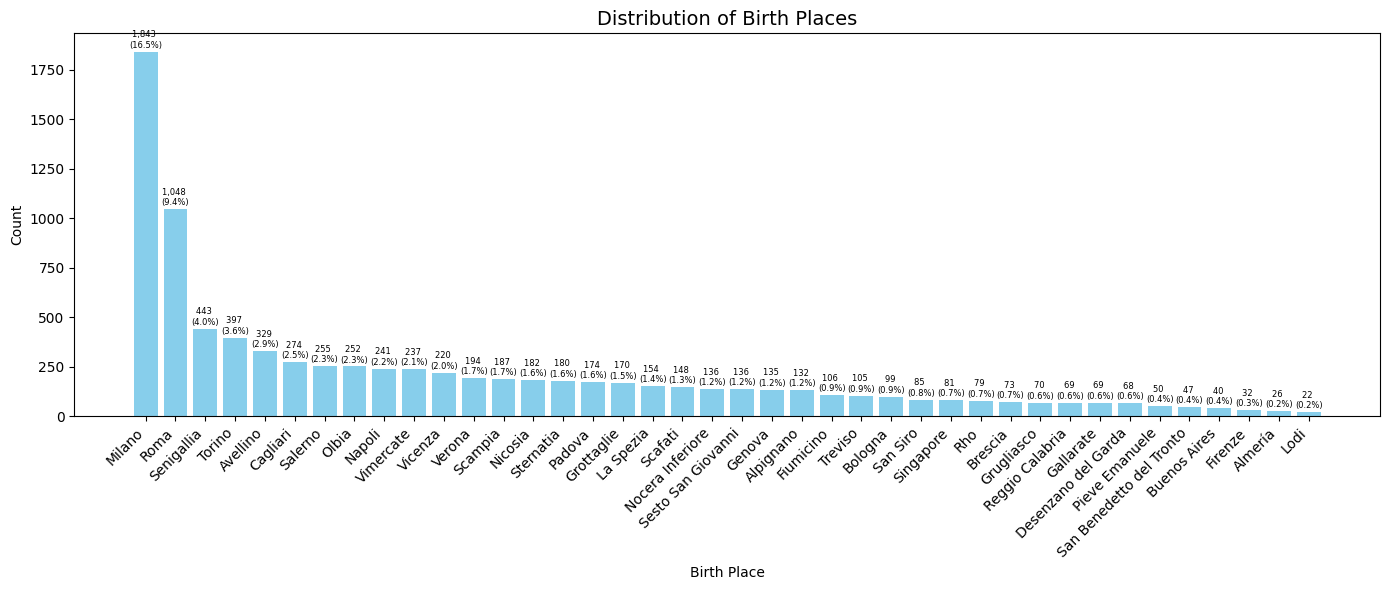

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Count occurrences and calculate percentages
birth_place_counts = df['birth_place'].value_counts()
print(birth_place_counts)
birth_place_percent = (birth_place_counts / len(df)) * 100

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(birth_place_counts.index, birth_place_counts.values, color='skyblue')

# Labels and title
plt.title('Distribution of Birth Places', fontsize=14)
plt.xlabel('Birth Place')
plt.ylabel('Count')

# Add both count and percentage labels above bars
for i, (count, percent) in enumerate(zip(birth_place_counts.values, birth_place_percent.values)):
    plt.text(i, count + 10, f"{count:,} \n({percent:.1f}%)", 
             ha='center', va='bottom', fontsize=6, color='black')

plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()


##### Checking Birth Place–Country Consistency (doubt)

This section verifies whether each artist’s birth place matches their country. It defines a list of known Italian cities and maps a few foreign cities to their respective countries. T The result shows the number of mismatches and lists the inconsistent records. The results show 26 mismatches, all involving artists born in Almería (Spain) but recorded with the country Italia

In [ ]:

# List of Italian cities from the data
italian_cities = [
    "Milano", "Roma", "Senigallia", "Torino", "Avellino", "Cagliari", "Salerno",
    "Olbia", "Napoli", "Vimercate", "Vicenza", "Verona", "Scampia", "Nicosia",
    "Sternatia", "Padova", "Grottaglie", "La Spezia", "Scafati", "Nocera Inferiore",
    "Sesto San Giovanni", "Genova", "Alpignano", "Fiumicino", "Treviso", "Bologna",
    "San Siro", "Rho", "Brescia", "Grugliasco", "Reggio Calabria", "Gallarate",
    "Desenzano del Garda", "Pieve Emanuele", "San Benedetto del Tronto", "Firenze",
    "Lodi"
]

# Map known foreign cities to their countries
foreign_cities_to_country = {
    "Singapore": "Singapore",
    "Buenos Aires": "Argentina",
    "Almería": "Spagna",
}


# Function to check birth_place vs country
def check_birth_place_country(row):
    if pd.notna(row['birth_place']) and pd.notna(row['country']):
        if row['birth_place'] in italian_cities and row['country'] != "Italia":
            return True  # mismatch
        elif row['birth_place'] in foreign_cities_to_country:
            if row['country'] != foreign_cities_to_country[row['birth_place']]:
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_country_mismatch'] = df.apply(check_birth_place_country, axis=1)

# Count mismatches
num_mismatches = df['birth_place_country_mismatch'].sum()
print(f"Number of birth_place-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['birth_place_country_mismatch']]
display(mismatched_records[['birth_place', 'country',]])


Number of birth_place-country mismatches: 26


,birth_place,country
1629,Almería,Italia
1630,Almería,Italia
1631,Almería,Italia
1632,Almería,Italia
1633,Almería,Italia
1634,Almería,Italia
1635,Almería,Italia
1636,Almería,Italia
1637,Almería,Italia
1638,Almería,Italia


##### Birth Place vs Nationality Consistency Check

This step verifies that each artist’s birth place aligns with their nationality. A list of Italian cities and a mapping of known foreign cities (like Almería, Buenos Aires, and Singapore) were used for comparison.

The results show 107 mismatches, mainly involving artists born in Almería or Singapore but labeled with the nationality Italia, indicating possible errors or inconsistencies in the dataset.

In [77]:
import pandas as pd

# List of Italian cities
italian_cities = [
    "Milano", "Roma", "Senigallia", "Torino", "Avellino", "Cagliari", "Salerno",
    "Olbia", "Napoli", "Vimercate", "Vicenza", "Verona", "Scampia", "Nicosia",
    "Sternatia", "Padova", "Grottaglie", "La Spezia", "Scafati", "Nocera Inferiore",
    "Sesto San Giovanni", "Genova", "Alpignano", "Fiumicino", "Treviso", "Bologna",
    "San Siro", "Rho", "Brescia", "Grugliasco", "Reggio Calabria", "Gallarate",
    "Desenzano del Garda", "Pieve Emanuele", "San Benedetto del Tronto", "Firenze",
    "Lodi"
]


# Map special foreign cities to nationality
foreign_cities_to_nationality = {
    "Singapore": "Singapore",
    "Buenos Aires": "Argentina",
    "Almería": "Spagna",
}

# Function to check birth_place vs nationality
def check_birth_place_nationality(row):
    if pd.notna(row['birth_place']) and pd.notna(row['nationality']):
        if row['birth_place'] in italian_cities and row['nationality'] != "Italia":
            return True  # mismatch
        elif row['birth_place'] in foreign_cities_to_nationality:
            if row['nationality'] != foreign_cities_to_nationality[row['birth_place']]:
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_nationality_mismatch'] = df.apply(check_birth_place_nationality, axis=1)

# Count mismatches
num_mismatches = df['birth_place_nationality_mismatch'].sum()
print(f"Number of birth_place-nationality mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['birth_place_nationality_mismatch']]
print(mismatched_records[['name','birth_place', 'nationality','country']])


Number of birth_place-nationality mismatches: 107
                  name birth_place nationality country
1629  chadia rodriguez     Almería      Italia  Italia
1630  chadia rodriguez     Almería      Italia  Italia
1631  chadia rodriguez     Almería      Italia  Italia
1632  chadia rodriguez     Almería      Italia  Italia
1633  chadia rodriguez     Almería      Italia  Italia
...                ...         ...         ...     ...
5346            baby k   Singapore      Italia     NaN
5347            baby k   Singapore      Italia     NaN
5348            baby k   Singapore      Italia     NaN
5349            baby k   Singapore      Italia     NaN
5350            baby k   Singapore      Italia     NaN

[107 rows x 4 columns]


##### Distribution of Songs by Province and Region

This code calculates and visualizes the percentage distribution of songs by province and region. It counts occurrences, converts them to percentages, and displays bar charts with labeled values to show which areas have the highest song representation

Provinces
province
Milano                   2193
Roma                     1154
Torino                    599
Salerno                   539
Ancona                    443
Napoli                    428
Avellino                  329
Cagliari                  274
Gallura                   252
Monza e della Brianza     237
Vicenza                   220
Verona                    194
Enna                      182
Lecce                     180
Padova                    174
Taranto                   170
Genova                    161
La Spezia                 154
Brescia                   141
Treviso                   105
Bologna                    99
Varese                     69
Reggio Calabria            69
Ascoli Piceno              47
Firenze                    32
Lodi                       22
Name: count, dtype: int64


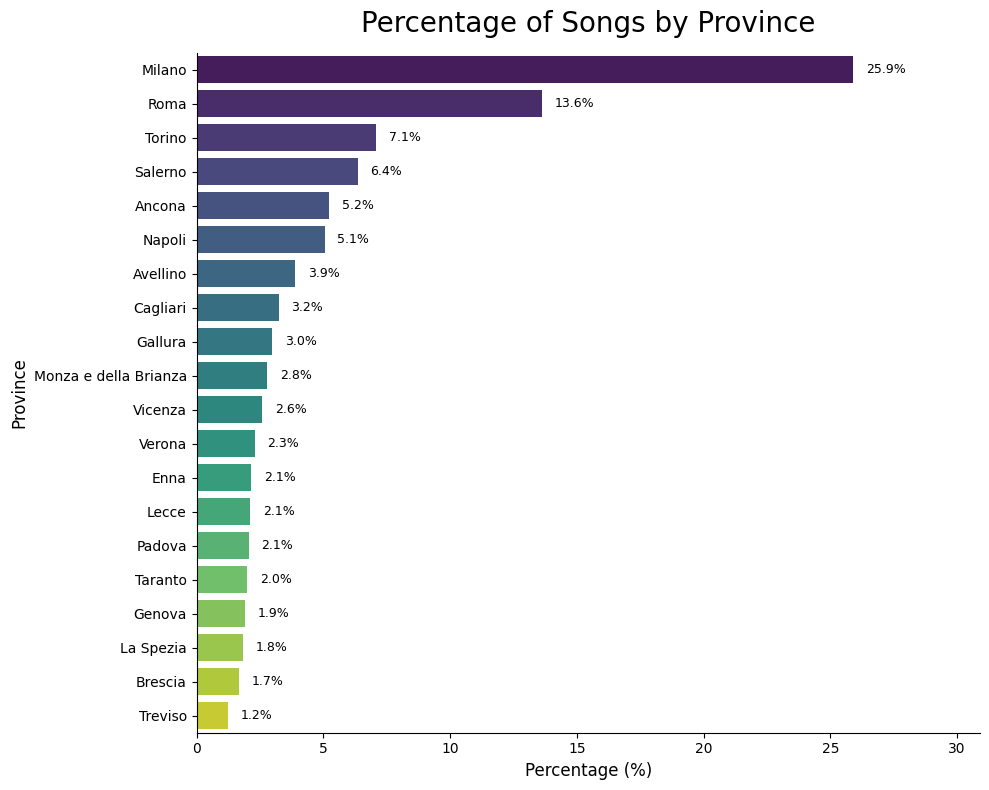

Regions
region
Lombardia         2662
Campania          1296
Lazio             1154
Veneto             693
Piemonte           599
Sardegna           526
Puglia             350
Liguria            315
Sicilia            182
Emilia-Romagna      99
Calabria            69
Marche              47
Toscana             32
Name: count, dtype: int64


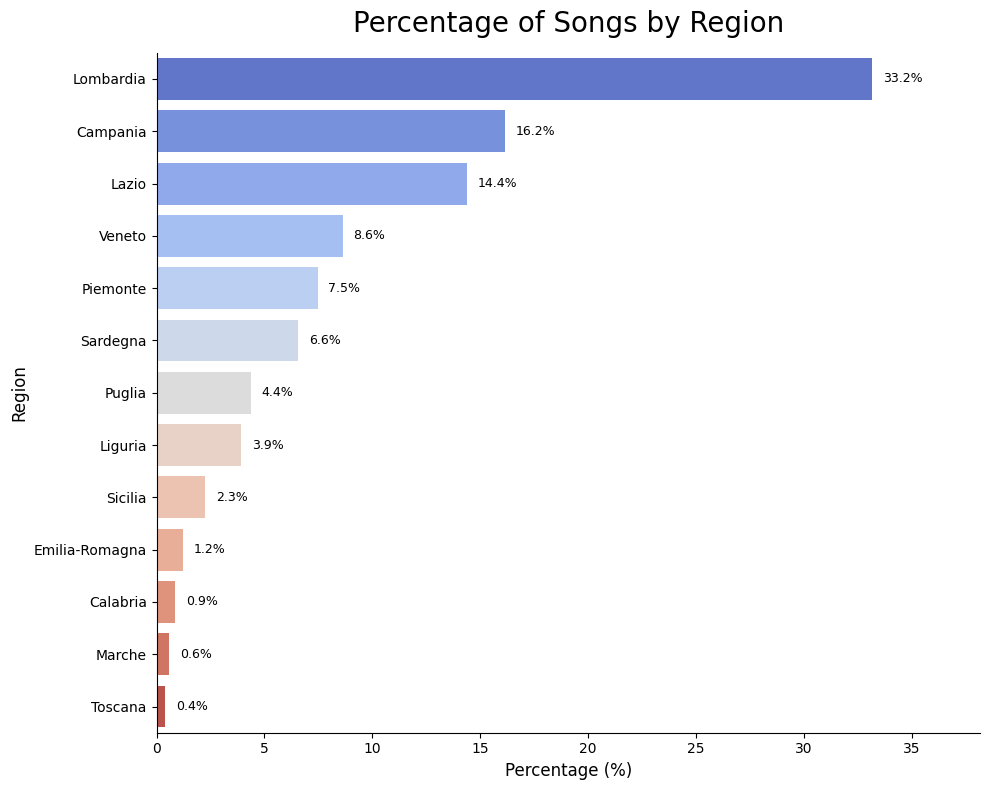

In [69]:

# Count occurrences and convert to percentages
province_counts = df['province'].value_counts()
province_percent = (province_counts / province_counts.sum()) * 100
print('Provinces')
print(province_counts)

# Create a DataFrame for plotting
province_df = province_percent.reset_index()
province_df.columns = ['province', 'percent']


plt.figure(figsize=(10, 8))
sns.barplot(
    data=province_df.head(20),  # top 20 provinces if you want
    x='percent',
    y='province',
    hue='province',
    palette='viridis',
    dodge=False
)

plt.title("Percentage of Songs by Province", fontsize=20, pad=15, color="#000000")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Province", fontsize=12)

# Add percentage labels
for index, value in enumerate(province_df.head(20)['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, province_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()



region_counts = df['region'].value_counts()
print('Regions')
print(region_counts)
region_percent = (region_counts / region_counts.sum()) * 100
region_df = region_percent.reset_index()
region_df.columns = ['region', 'percent']

plt.figure(figsize=(10, 8))
sns.barplot(
    data=region_df,
    x='percent',
    y='region',
    hue='region',
    palette='coolwarm',
    dodge=False
)

plt.title("Percentage of Songs by Region", fontsize=20, pad=15, color="#000000")
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Add percentage labels
for index, value in enumerate(region_df['percent']):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=9, color='#000000')

plt.xlim(0, region_df['percent'].max() + 5)
sns.despine()
plt.tight_layout()
plt.show()


##### Province/Region – Country Consistency Check

This code verifies that Italian provinces and regions are correctly associated with the country "Italia"

In [66]:
import pandas as pd

# Example mapping of Italian regions to their provinces (from your data)
region_provinces = {
    "Lombardia": ["Milano", "Monza e della Brianza", "Brescia", "Varese", "Lodi"],
    "Campania": ["Salerno", "Napoli", "Avellino"],
    "Lazio": ["Roma"],
    "Veneto": ["Vicenza", "Verona", "Padova", "Treviso"],
    "Piemonte": ["Torino"],
    "Sardegna": ["Cagliari", "Gallura"],
    "Puglia": ["Lecce", "Taranto"],
    "Liguria": ["Genova", "La Spezia"],
    "Sicilia": ["Enna"],
    "Emilia-Romagna": ["Bologna"],
    "Calabria": ["Reggio Calabria"],
    "Marche": ["Ancona", "Ascoli Piceno"],
    "Toscana": ["Firenze"]
}

# Flatten all Italian provinces for quick lookup
all_italian_provinces = [prov for provs in region_provinces.values() for prov in provs]

# Function to check province/region ↔ country
def check_province_region_country(row):
    if pd.notna(row['country']):
        if pd.notna(row['province']) and row['province'] in all_italian_provinces:
            if row['country'] != "Italia":
                return True  # mismatch
        elif pd.notna(row['region']) and row['region'] in region_provinces.keys():
            if row['country'] != "Italia":
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['province_region_country_mismatch'] = df.apply(check_province_region_country, axis=1)

# Count mismatches
num_mismatches = df['province_region_country_mismatch'].sum()
print(f"Number of province/region-country mismatches: {num_mismatches}")

# Show records with mismatch
mismatched_records = df[df['province_region_country_mismatch']]
print(mismatched_records[['province', 'region', 'country']])


Number of province/region-country mismatches: 0
Empty DataFrame
Columns: [province, region, country]
Index: []


##### Province/Region vs Birth Place – Consistency Check (doubt)

This check compares each artist’s birth_place with the corresponding province and region. Mismatches occur when the province or region does not align with the birth_place. There are 2,901 mismatches between birth_place and province/region.

In [70]:
import pandas as pd

# Updated mapping of Italian regions to provinces including all birth_places in your data
region_provinces = {
    "Lombardia": ["Milano", "Vimercate", "Sesto San Giovanni", "Alpignano", "Fiumicino",
                  "Brescia", "Grugliasco", "Rho", "Gallarate", "Desenzano del Garda", "Lodi", "San Siro"],
    "Lazio": ["Roma"],
    "Piemonte": ["Torino"],
    "Campania": ["Salerno", "Napoli", "Avellino", "Scafati", "Nocera Inferiore"],
    "Veneto": ["Vicenza", "Verona", "Padova", "Treviso"],
    "Sardegna": ["Cagliari", "Olbia", "Gallura"],
    "Puglia": ["Lecce", "Taranto", "Grottaglie", "Sternatia", "San Benedetto del Tronto"],
    "Liguria": ["Genova", "La Spezia"],
    "Sicilia": ["Enna", "Nicosia"],
    "Emilia-Romagna": ["Bologna"],
    "Calabria": ["Reggio Calabria"],
    "Marche": ["Ancona", "Senigallia", "Ascoli Piceno"],
    "Toscana": ["Firenze", "Scampia", "Padova"]
}

# Flatten province → region mapping
province_to_region = {prov: reg for reg, provs in region_provinces.items() for prov in provs}

# Function to check birth_place ↔ province/region
def check_birth_place_province_region(row):
    if pd.notna(row['birth_place']):
        # Only check Italian birth_places
        if row['birth_place'] in province_to_region:
            expected_region = province_to_region[row['birth_place']]
            # Compare province and region if available
            if (pd.notna(row['province']) and row['province'] != row['birth_place']) or \
               (pd.notna(row['region']) and row['region'] != expected_region):
                return True  # mismatch
    return False  # coherent or missing data

# Apply the function
df['birth_place_province_region_mismatch'] = df.apply(check_birth_place_province_region, axis=1)

# Count mismatches
num_mismatches = df['birth_place_province_region_mismatch'].sum()
print(f"Number of birth_place-province/region mismatches: {num_mismatches}")

# Show mismatched records
mismatched_records = df[df['birth_place_province_region_mismatch']]
print(mismatched_records[['birth_place', 'province', 'region']])


Number of birth_place-province/region mismatches: 2901
      birth_place province    region
0      Grugliasco   Torino  Piemonte
1      Grugliasco   Torino  Piemonte
2      Grugliasco   Torino  Piemonte
3      Grugliasco   Torino  Piemonte
4      Grugliasco   Torino  Piemonte
...           ...      ...       ...
11161     Nicosia     Enna   Sicilia
11162     Nicosia     Enna   Sicilia
11163     Nicosia     Enna   Sicilia
11164     Nicosia     Enna   Sicilia
11165     Nicosia     Enna   Sicilia

[2901 rows x 3 columns]


##### Geographic Distribution of Artists by Province and Region

This analysis aggregates the number of artists by their latitude, longitude, province, and region. The resulting table shows the locations with the highest concentration of artists at the top. For example, Milano (Lombardia) has the most artists with 1,843, followed by Roma (Lazio) with 1,048, and Torino (Piemonte) with 397. The code also generates a map where the size and color of the points reflect the number of artists per location, providing a clear visual of artist density across Italy.

In [73]:
import plotly.express as px

# Aggregate by latitude and longitude to count number of artists
location_counts = df.groupby(['latitude', 'longitude', 'region', 'province']).size().reset_index(name='num_artists')

# Sort by number of artists descending
location_counts = location_counts.sort_values(by='num_artists', ascending=False)

# Print the sorted table
print(location_counts)

# Define a color scale
color_scale = [(0, 'orange'), (1,'red')]

# Create the scatter map
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    hover_data=["region", "province", "num_artists"],  # show count on hover
    size="num_artists",  # size of marker represents number of artists
    color="num_artists",  # color also shows density
    color_continuous_scale=color_scale,
    zoom=5,
    height=800,
    width=800
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


     latitude  longitude          region               province  num_artists
27  45.464194   9.189635       Lombardia                 Milano         1843
13  41.893320  12.482932           Lazio                   Roma         1048
20  45.067755   7.682489        Piemonte                 Torino          397
11  40.996545  15.140569        Campania               Avellino          329
2   39.217199   9.113311        Sardegna               Cagliari          274
4   40.419442  15.310609        Campania                Salerno          255
10  40.923266   9.502744        Sardegna                Gallura          252
8   40.835885  14.248768        Campania                 Napoli          241
32  45.613963   9.370060       Lombardia  Monza e della Brianza          237
33  45.634859  11.406354          Veneto                Vicenza          220
26  45.442498  10.985738          Veneto                 Verona          194
9   40.899988  14.241052        Campania                 Napoli          187

C:\Users\Mary\AppData\Local\Temp\ipykernel_14132\1328699887.py:16: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

